# Epitech Bootcamp Data - Rush 4

## Imports librairies

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


## Chargement de données

In [433]:
data_camp_market = pd.read_csv("Ressources/Data/Camp_Market.csv", sep=";")

## EDA - Exploratory Data Analysis - Analyse exploratoire

### Analyse descriptive simple

In [434]:
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [435]:
data_camp_market.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

Vérification des valeurs manquantes

In [436]:
print(data_camp_market.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Vérificiation de s'il y a des lignes en double

In [437]:
print(data_camp_market.duplicated().sum())

0


### Séparation données manquantes
On va se séparer des clients qui n'ont pas renseigné d'info sur leur salaire

In [438]:
data_income_null = data_camp_market[data_camp_market["Income"].isnull()]
print(data_income_null.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 10 to 2228
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   24 non-null     int64  
 1   Year_Birth           24 non-null     int64  
 2   Education            24 non-null     object 
 3   Marital_Status       24 non-null     object 
 4   Income               0 non-null      float64
 5   Kidhome              24 non-null     int64  
 6   Teenhome             24 non-null     int64  
 7   Dt_Customer          24 non-null     object 
 8   Recency              24 non-null     int64  
 9   MntWines             24 non-null     int64  
 10  MntFruits            24 non-null     int64  
 11  MntMeatProducts      24 non-null     int64  
 12  MntFishProducts      24 non-null     int64  
 13  MntSweetProducts     24 non-null     int64  
 14  MntGoldProds         24 non-null     int64  
 15  NumDealsPurchases    24 non-null     int64  

In [439]:
print(data_income_null)

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Gra

In [440]:
# On retire les lignes avec des valeurs nulles de la variable "income" de notre dataframe principal
data_camp_market = data_camp_market[data_camp_market["Income"].notnull()].reset_index()
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

### Modification colonnes

In [441]:
data_camp_market["Dt_Customer"] = pd.to_datetime(data_camp_market["Dt_Customer"], dayfirst=True, errors="coerce")

In [442]:
# Renommer colonne GoldProds
data_camp_market.rename(columns={'MntGoldProds': 'MntGoldProducts'}, inplace=True)

Vérification

In [443]:
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                2216 non-null   int64         
 1   ID                   2216 non-null   int64         
 2   Year_Birth           2216 non-null   int64         
 3   Education            2216 non-null   object        
 4   Marital_Status       2216 non-null   object        
 5   Income               2216 non-null   float64       
 6   Kidhome              2216 non-null   int64         
 7   Teenhome             2216 non-null   int64         
 8   Dt_Customer          2216 non-null   datetime64[ns]
 9   Recency              2216 non-null   int64         
 10  MntWines             2216 non-null   int64         
 11  MntFruits            2216 non-null   int64         
 12  MntMeatProducts      2216 non-null   int64         
 13  MntFishProducts      2216 non-nul

### Suppression colonnes inutiles

In [444]:
# Supprimer les colonnes inutiles
data_camp_market = data_camp_market.drop(columns=["ID", "Z_CostContact", "Z_Revenue", "index"])
# On vérifie que les colonnes ont bien été supprimées
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2216 non-null   int64         
 1   Education            2216 non-null   object        
 2   Marital_Status       2216 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2216 non-null   int64         
 5   Teenhome             2216 non-null   int64         
 6   Dt_Customer          2216 non-null   datetime64[ns]
 7   Recency              2216 non-null   int64         
 8   MntWines             2216 non-null   int64         
 9   MntFruits            2216 non-null   int64         
 10  MntMeatProducts      2216 non-null   int64         
 11  MntFishProducts      2216 non-null   int64         
 12  MntSweetProducts     2216 non-null   int64         
 13  MntGoldProducts      2216 non-nul

### Graphiques

#### Création d'une fonction pour les couleurs des graphiques

In [445]:
def set_custom_style():
    """
    Configure un style personnalisé pour tous les graphiques
    avec une palette de couleurs cohérente bleu-violet
    """
    # Configuration générale
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Paramètres généraux
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    
    # Couleurs de fond
    plt.rcParams['figure.facecolor'] = '#F3F0FF'
    plt.rcParams['axes.facecolor'] = '#E0E7FF'
    plt.rcParams['grid.color'] = '#CBD5E1'
    plt.rcParams['grid.alpha'] = 0.4
    
    # Palette de couleurs personnalisée
    custom_colors = {
        'primary': '#4F46E5',      # Bleu indigo principal
        'secondary': '#7C3AED',    # Violet
        'accent': '#2563EB',       # Bleu royal
        'light': '#93C5FD',        # Bleu clair
        'palette': ['#7C3AED', '#4F46E5', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD']
    }
    
    return custom_colors

def style_ax(ax, title=None): 
    """
    Applique un style cohérent à un axe matplotlib
    """
    if title:
        ax.set_title(title, color='#1E3A8A', fontsize=14, fontweight='bold')
    
    ax.set_facecolor('#E0E7FF')
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.tick_params(labelcolor='#1E40AF')
    ax.set_xlabel(ax.get_xlabel(), color='#1E40AF')
    ax.set_ylabel(ax.get_ylabel(), color='#1E40AF')

#### Histogrammes

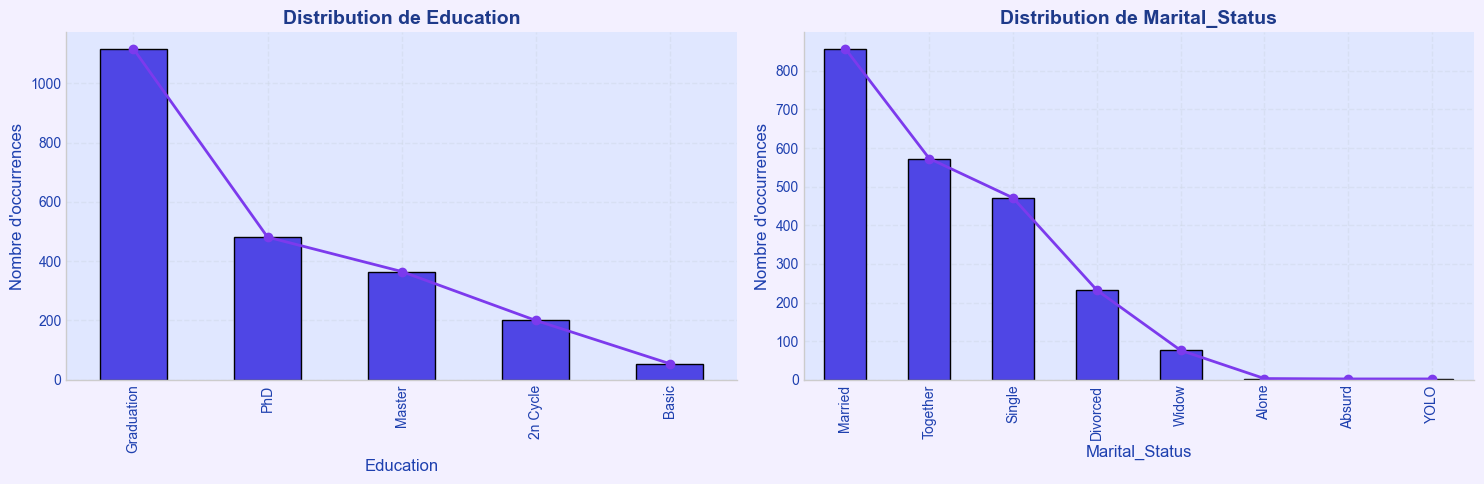

In [446]:
# Récupération des couleurs personnalisées
colors = set_custom_style()

cat_cols = data_camp_market.select_dtypes(include=['object', 'string']).columns
n = len(cat_cols)
n_cols = 2
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = data_camp_market[col].value_counts()
    
    # Barres avec les couleurs personnalisées
    counts.plot(
        kind='bar',
        ax=ax,
        color=colors['primary'],
        edgecolor='black'
    )
    
    # Courbe avec la couleur secondaire
    ax.plot(
        range(len(counts)),
        counts.values,
        color=colors['secondary'],
        marker='o',
        linewidth=2
    )
    
    # Application du style personnalisé
    style_ax(ax, title=f"Distribution de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Nombre d'occurrences")

# Cache les axes vides restants
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

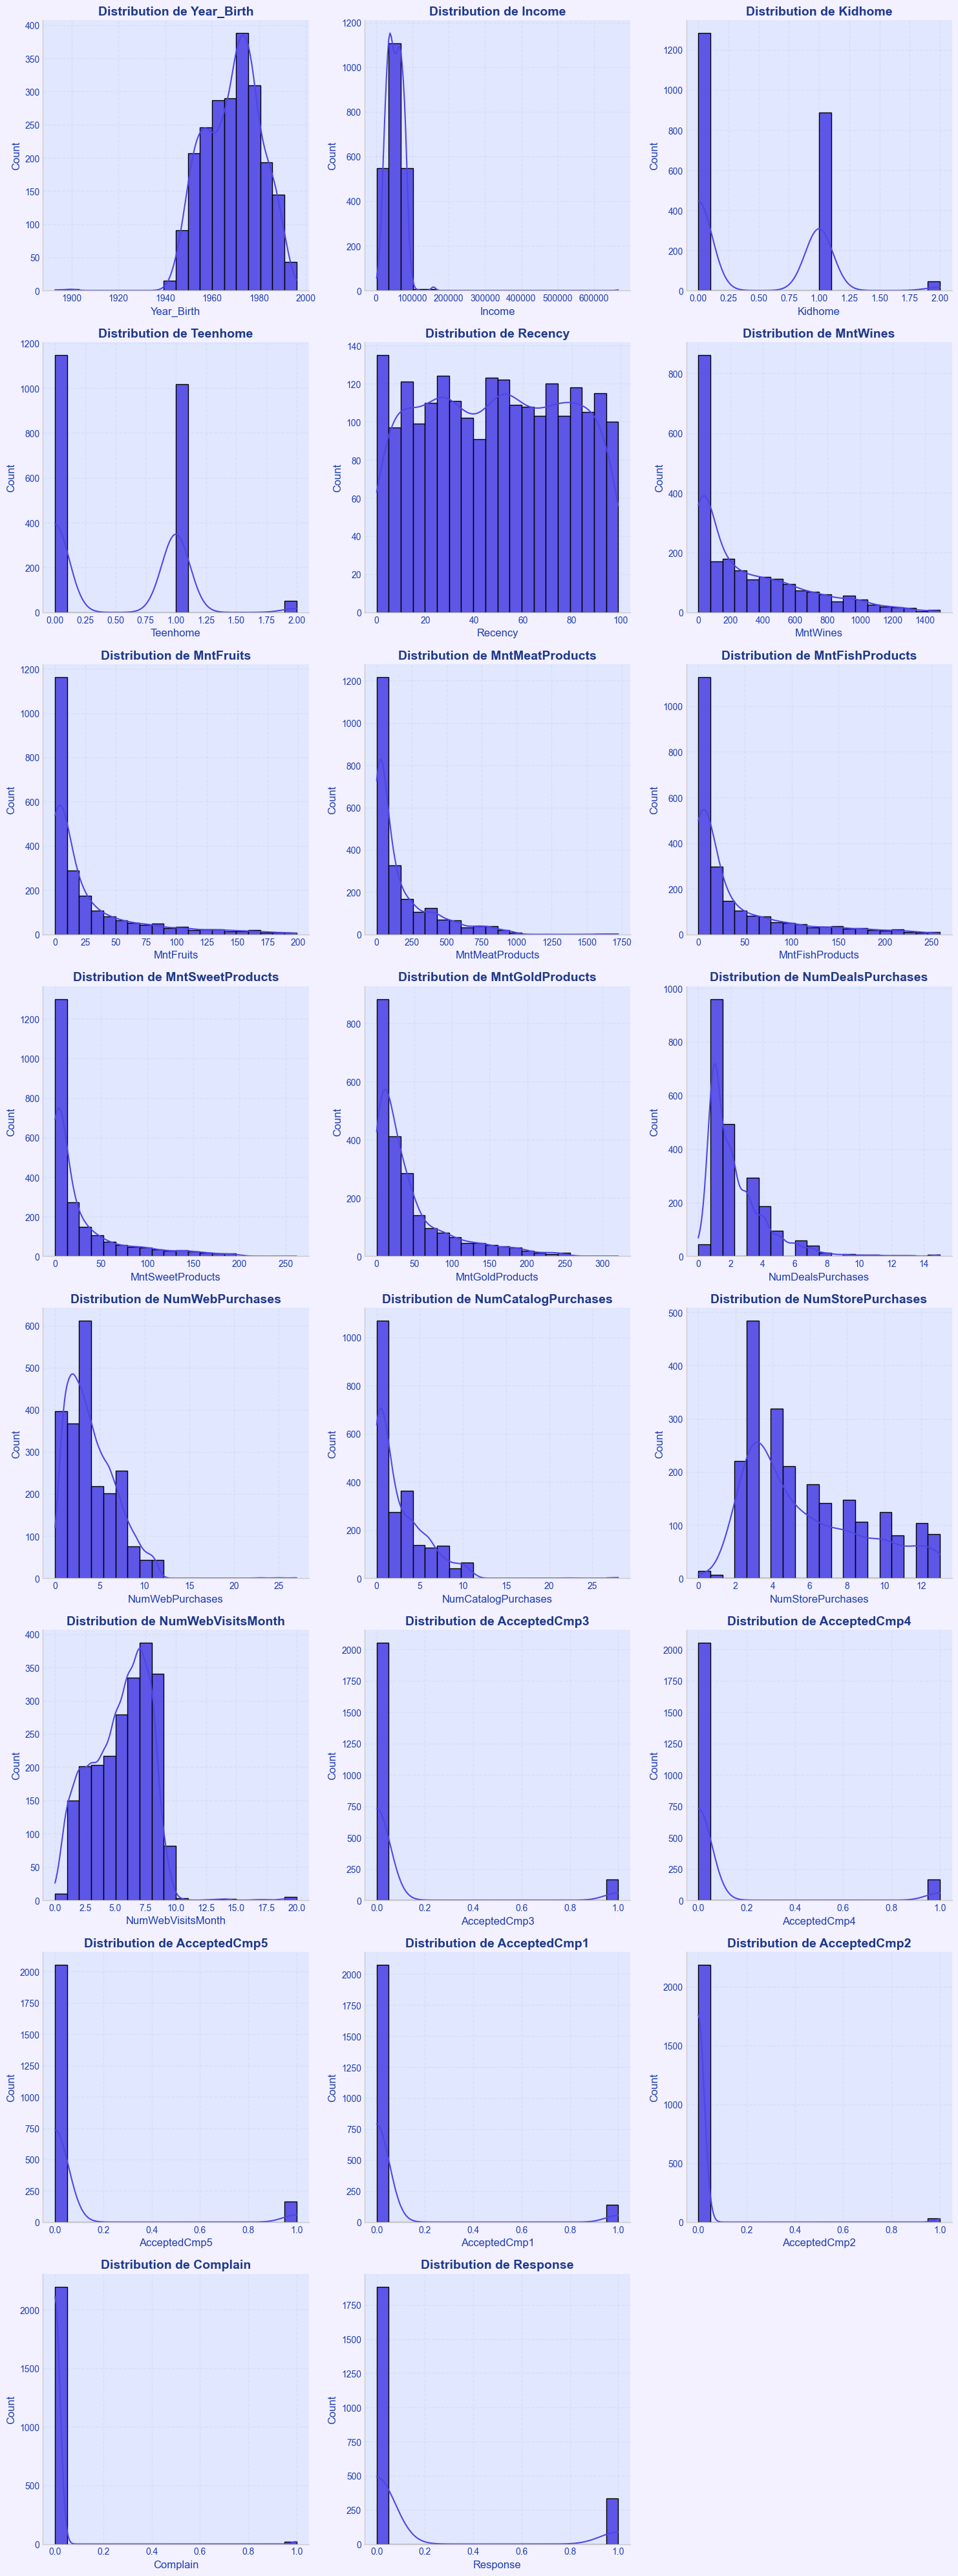

In [447]:
num_cols = data_camp_market.select_dtypes(include=['int', 'float']).columns 
n = len(num_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    
    # Utilisation de la couleur primaire pour l'histogramme
    sns.histplot(
        data=data_camp_market[col], 
        bins=20, 
        kde=True, 
        color=colors['primary'],
        edgecolor='black', 
        ax=ax, 
        alpha=0.9
    )
    
    # Application du style personnalisé
    style_ax(ax, title=f"Distribution de {col}")

# Cache les axes vides restants
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Boxplots

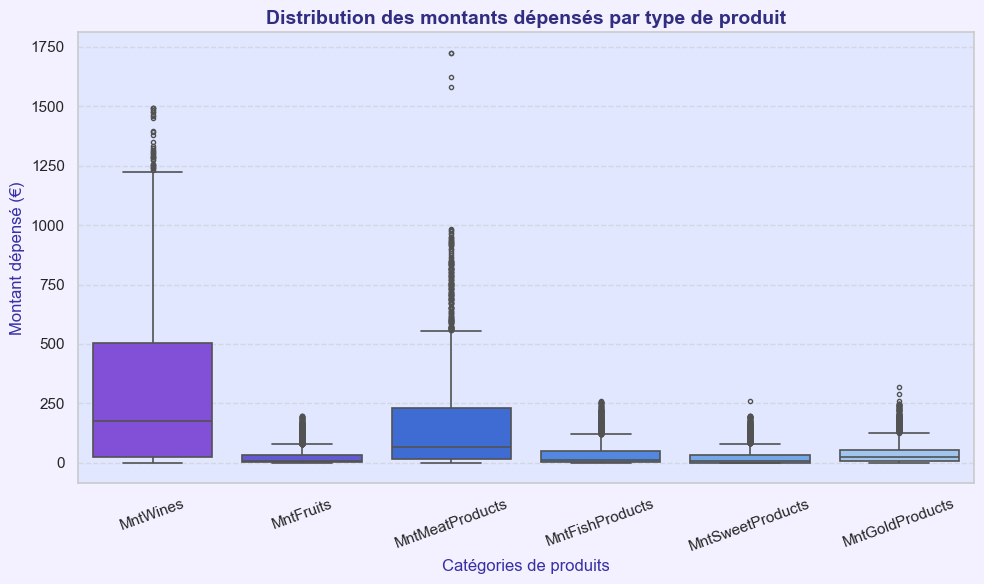

In [448]:
cols = ["MntWines", "MntFruits", "MntMeatProducts",
        "MntFishProducts", "MntSweetProducts", "MntGoldProducts"]

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = colors['palette']
# palette = sns.color_palette(["#4F46E5", "#6366F1", "#818CF8", "#A78BFA", "#C084FC", "#E0E7FF"])

sns.boxplot(
    data=data_camp_market[cols],
    palette=palette,
    linewidth=1.2,
    fliersize=3
)


plt.title("Distribution des montants dépensés par type de produit",
          fontsize=14, fontweight='bold', color='#312E81')
plt.xlabel("Catégories de produits", fontsize=12, color='#3730A3')
plt.ylabel("Montant dépensé (€)", fontsize=12, color='#3730A3')
plt.xticks(rotation=20, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')

plt.tight_layout()
plt.show()

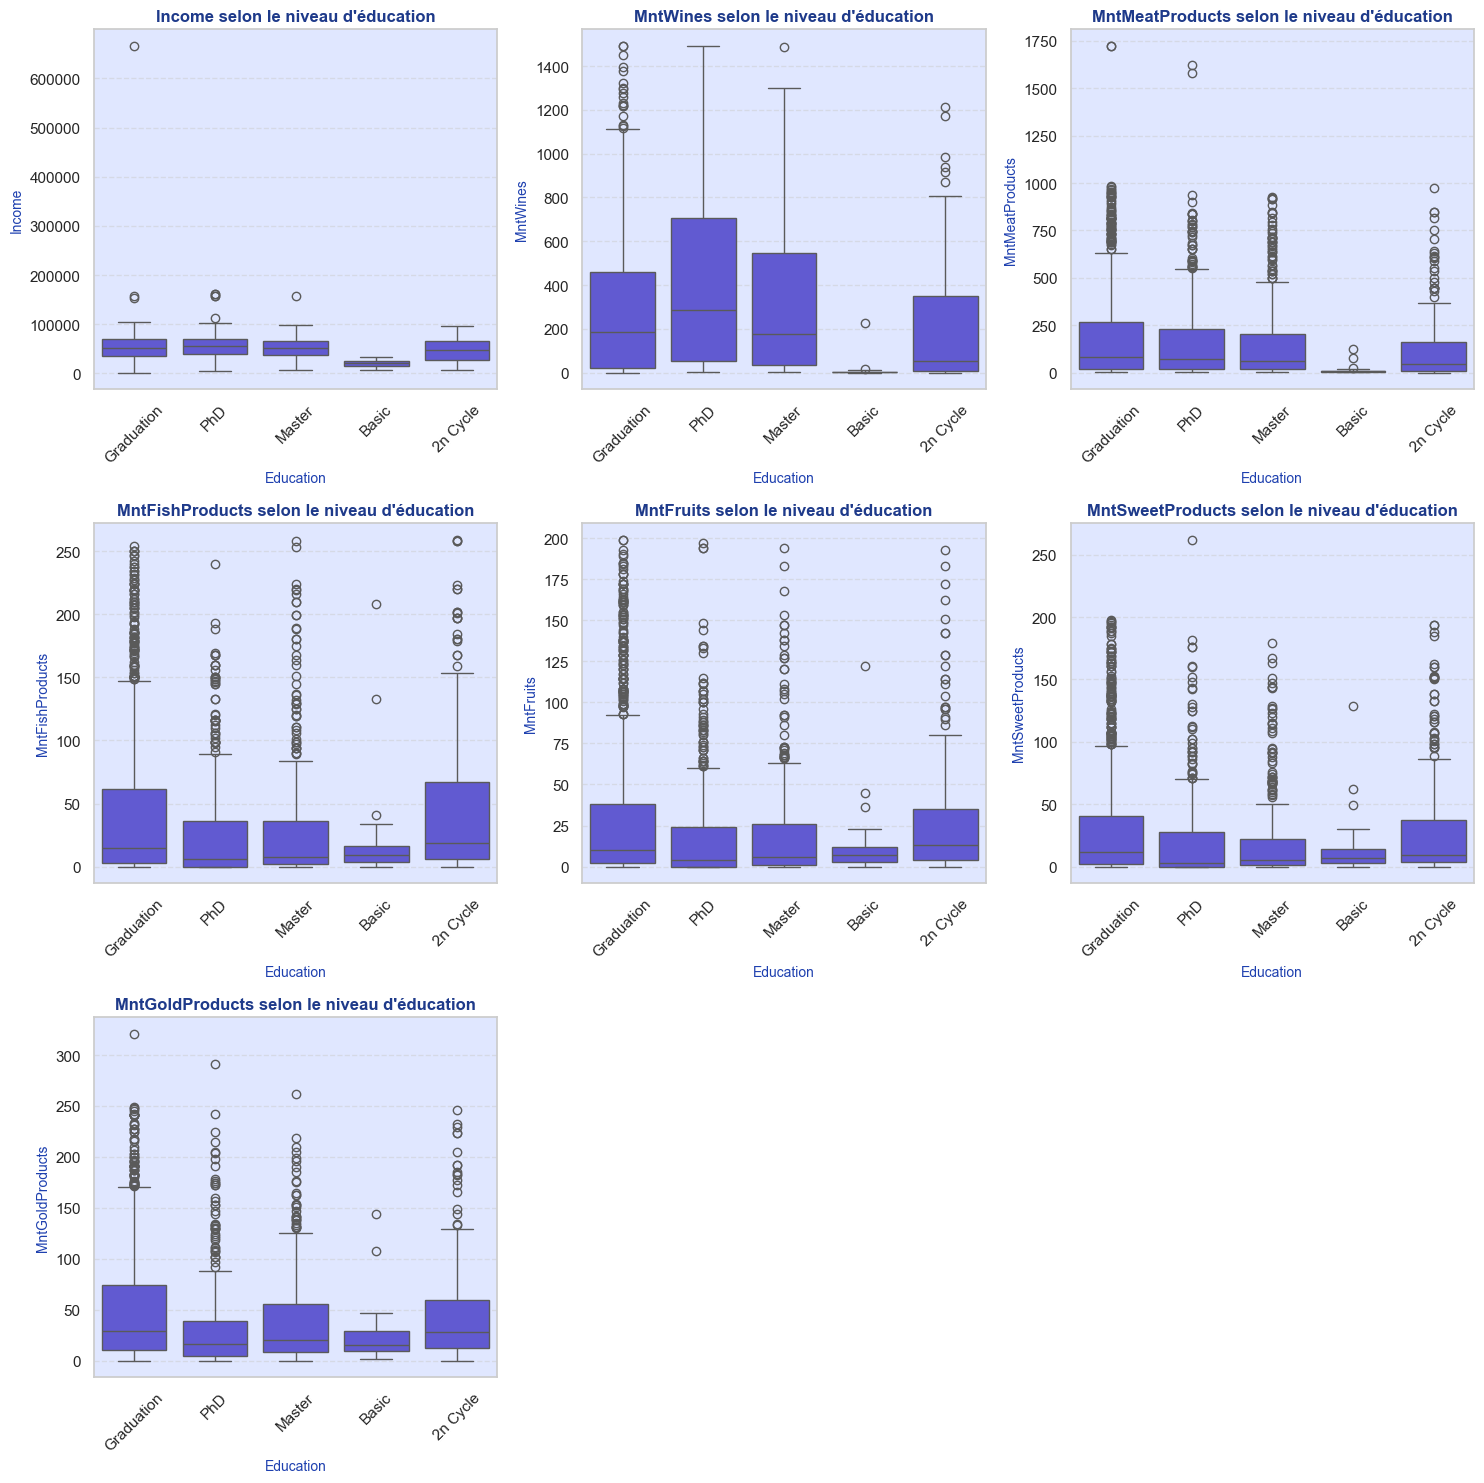

In [449]:
num_cols = ["Income", "MntWines", "MntMeatProducts", "MntFishProducts", "MntFruits",
            "MntSweetProducts", "MntGoldProducts"]

# Calcul du nombre de lignes nécessaires
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Création de la figure avec subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Palette de couleurs unique
single_color = '#4F46E5'

# Création des boxplots
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.boxplot(x="Education", y=col, data=data_camp_market, ax=ax, color=single_color)
    ax.set_title(f"{col} selon le niveau d'éducation", fontsize=12, fontweight='bold', color='#1E3A8A')
    ax.set_xlabel("Education", fontsize=10, color='#1E40AF')
    ax.set_ylabel(col, fontsize=10, color='#1E40AF')
    ax.tick_params(axis='x', rotation=45)
    
    # Style du fond
    ax.set_facecolor('#E0E7FF')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Masquer les axes vides restants
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

#### Scatter plot

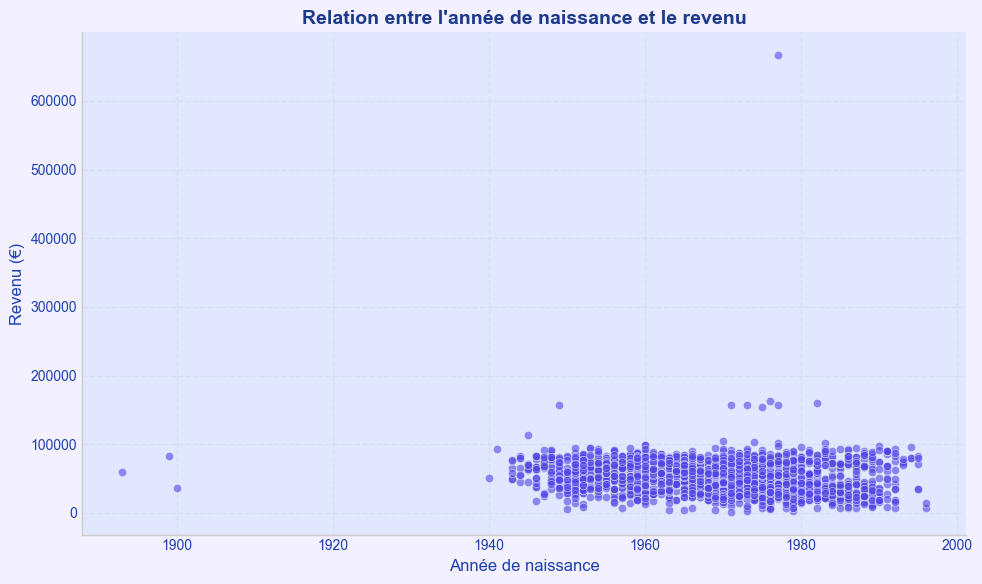

In [450]:
# Récupération des couleurs personnalisées
colors = set_custom_style()

# Création de la figure et du subplot
plt.figure(figsize=(10, 6))

# Création du scatter plot
sns.scatterplot(
    data=data_camp_market,
    x="Year_Birth", 
    y="Income",
    color=colors['primary'],
    alpha=0.6
)

# Application du style personnalisé
ax = plt.gca()
style_ax(ax, title="Relation entre l'année de naissance et le revenu")
plt.xlabel("Année de naissance")
plt.ylabel("Revenu (€)")

plt.tight_layout()
plt.show()

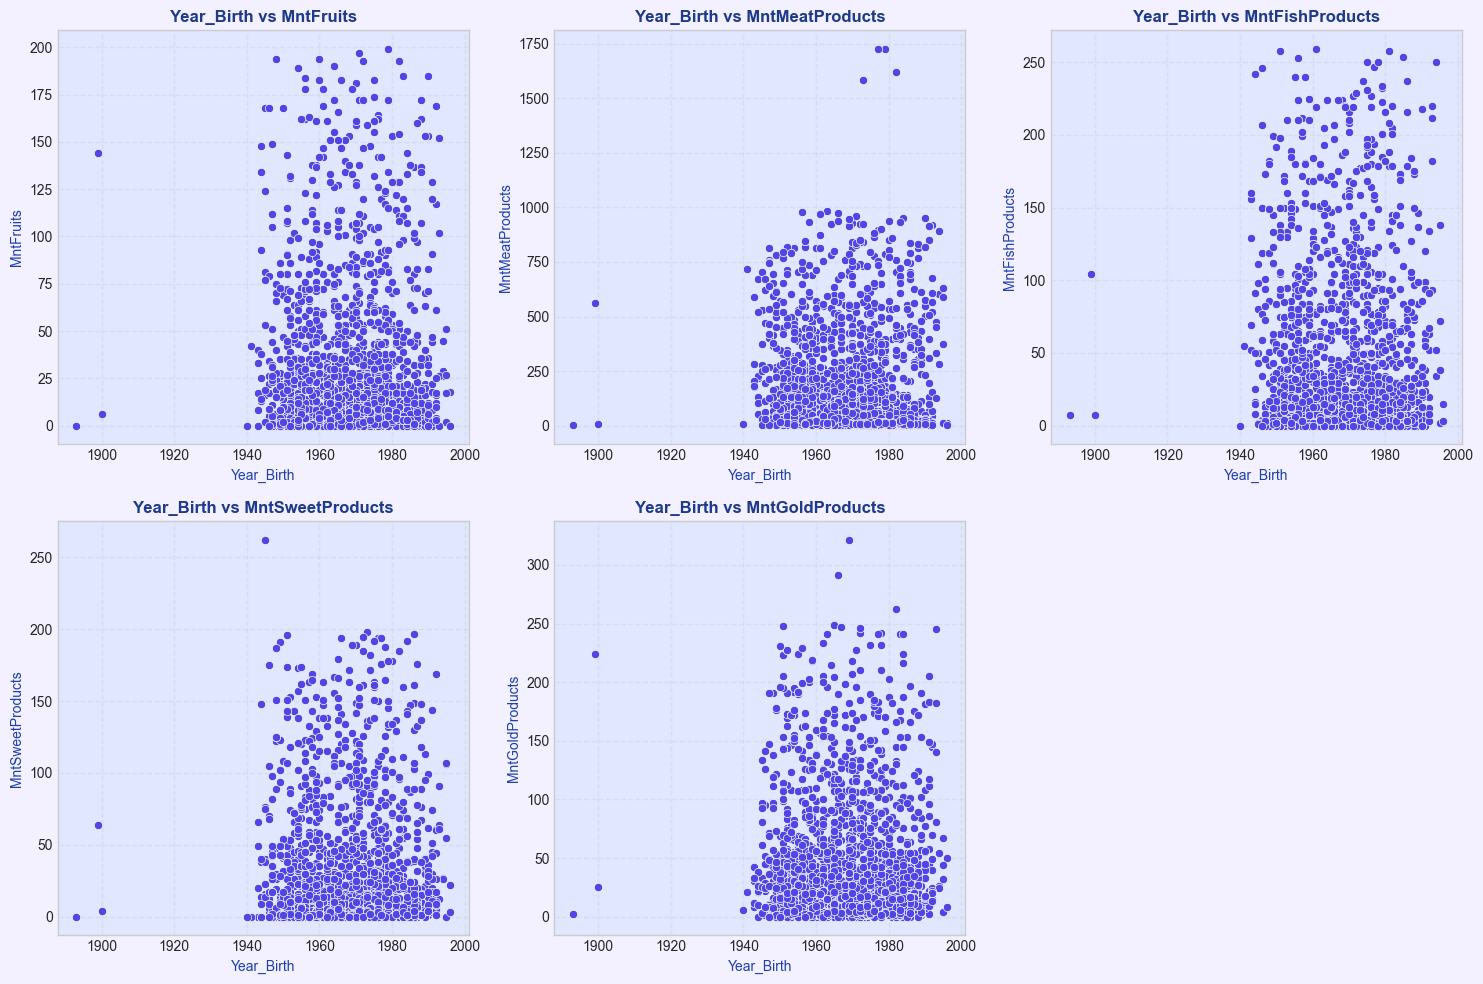

In [451]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts", 
          "MntSweetProducts", "MntGoldProducts"]

# Calcul du nombre de lignes nécessaires pour 3 colonnes
n_cols = 3
n_rows = (len(y_vars) + n_cols - 1) // n_cols

# Création de la figure avec subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Création des scatterplots
for i, y in enumerate(y_vars):
    ax = axes[i]
    sns.scatterplot(x="Year_Birth", y=y, data=data_camp_market, ax=ax, color='#4F46E5')
    ax.set_title(f"Year_Birth vs {y}", fontsize=12, fontweight='bold', color='#1E3A8A')
    ax.set_xlabel("Year_Birth", fontsize=10, color='#1E40AF')
    ax.set_ylabel(y, fontsize=10, color='#1E40AF')
    
    # Style du fond
    ax.set_facecolor('#E0E7FF')
    ax.grid(True, linestyle='--', alpha=0.5)

# Masquer les axes vides restants
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

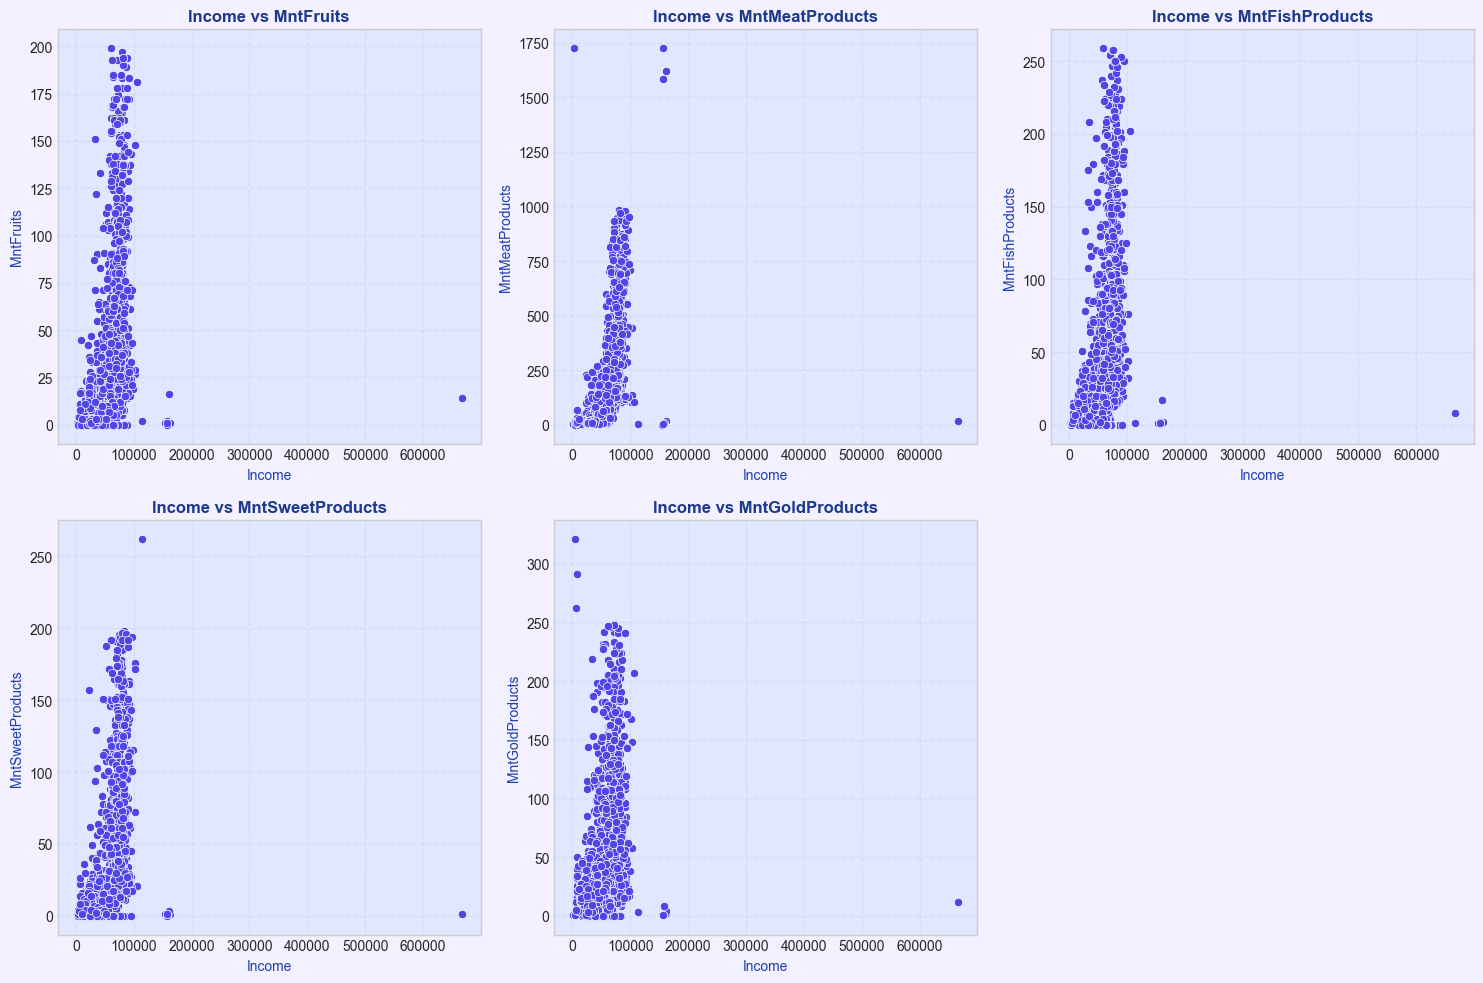

In [452]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProducts"]

# Calcul du nombre de lignes nécessaires pour 3 colonnes 
n_cols = 3
n_rows = (len(y_vars) + n_cols - 1) // n_cols

# Création de la figure avec subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplatir le tableau d'axes pour faciliter l'itération

# Création des scatterplots
for i, y in enumerate(y_vars):
    ax = axes[i]
    sns.scatterplot(x="Income", y=y, data=data_camp_market, ax=ax, color='#4F46E5')
    ax.set_title(f"Income vs {y}", fontsize=12, fontweight='bold', color='#1E3A8A')
    ax.set_xlabel("Income", fontsize=10, color='#1E40AF')
    ax.set_ylabel(y, fontsize=10, color='#1E40AF')
    
    # Style du fond
    ax.set_facecolor('#E0E7FF')
    ax.grid(True, linestyle='--', alpha=0.5)

# Masquer les axes vides restants
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

Visualisation des dépenses des clients pour chaque campagne

In [453]:
# # Calcul de la dépense totale
# data_camp_market['TotalSpent'] = (data_camp_market[['MntWines', 'MntFruits', 'MntMeatProducts', 
#                                                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']]
#                                  .sum(axis=1))

# campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# # Création d'une figure avec subplots
# n_cols = 3
# n_rows = (len(campaign_cols) + n_cols - 1) // n_cols
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
# axes = axes.flatten()

# # Style commun
# colors = ['#93C5FD', '#1E3A8A']
# background_color = '#EFF6FF'
# chart_color = '#DBEAFE'

# # Création des graphiques
# for i, campaign in enumerate(campaign_cols):
#     spending = data_camp_market.groupby(campaign)['TotalSpent'].mean()
    
#     # Plot sur le sous-graphique correspondant
#     ax = axes[i]
#     spending.plot(
#         kind='bar',
#         color=colors,
#         edgecolor='black',
#         linewidth=1.2,
#         ax=ax
#     )
    
#     ax.set_title(f"Dépense moyenne selon {campaign}",
#                 fontsize=12, fontweight='bold', color='#1E3A8A')
#     ax.set_xlabel("Campagne acceptée", fontsize=10, color='#1E40AF')
#     ax.set_ylabel("Dépense moyenne (€)", fontsize=10, color='#1E40AF')
#     ax.set_xticklabels(['Non', 'Oui'], rotation=0, fontsize=10)
    
#     # Style du fond
#     ax.set_facecolor(chart_color)
#     ax.grid(axis='y', linestyle='--', alpha=0.5)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)

# # Masquer les axes vides restants
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# # Style global
# fig.patch.set_facecolor(background_color)
# plt.tight_layout()
# plt.show()

Visualisation des dépenses des clients par nombre de campagnes acceptées

In [454]:
# data_camp_market['TotalMntSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProducts']
# data_camp_market['Total_Acc_Cmp'] = data_camp_market['AcceptedCmp1'] + data_camp_market['AcceptedCmp2'] + data_camp_market['AcceptedCmp3'] + data_camp_market['AcceptedCmp4'] + data_camp_market['AcceptedCmp5'] + data_camp_market['Response']
# avg_spending_by_total_campaigns = data_camp_market.groupby('Total_Acc_Cmp')['TotalMntSpent'].mean()
# print("Dépense moyenne selon le nombre total de campagnes acceptées")

# data_camp_market['TotalSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProducts']
# data_camp_market['TotalAcceptedCmp'] = data_camp_market[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum(axis=1)

# # Calcul de la dépense moyenne par nombre total de campagnes acceptées
# avg_spending_by_total_campaigns = data_camp_market.groupby('TotalAcceptedCmp')['TotalSpent'].mean()

# plt.figure(figsize=(10, 6))

# colors = plt.cm.cool(np.linspace(0.2, 0.8, len(avg_spending_by_total_campaigns)))

# avg_spending_by_total_campaigns.plot(
#     kind='bar',
#     color=colors,
#     edgecolor='black',
#     linewidth=1.2
# )

# plt.title("Dépense moyenne selon le nombre total de campagnes acceptées",
#           fontsize=14, fontweight='bold', color='#1E3A8A')
# plt.xlabel("Nombre total de campagnes acceptées", fontsize=12, color='#1E40AF')
# plt.ylabel("Dépense moyenne des clients (€)", fontsize=12, color='#1E40AF')

# # Modification des labels de l'axe x pour commencer à 1
# plt.xticks(range(len(avg_spending_by_total_campaigns)), 
#            range(1, len(avg_spending_by_total_campaigns) + 1), 
#            fontsize=11, rotation=0)
# plt.yticks(fontsize=11)

# fig = plt.gcf() 
# ax = plt.gca() 
# fig.patch.set_facecolor('#EFF6FF')
# ax.set_facecolor('#DBEAFE')

# ax.spines['right'].set_visible(False) 
# ax.spines['top'].set_visible(False)

# plt.tight_layout()
# plt.show()

### Retrait des outliers

In [455]:
outliers_annee_naissance = data_camp_market[data_camp_market["Year_Birth"] < 1920]
outliers_salaire_annuel = data_camp_market[data_camp_market["Income"] > 300000]

print(outliers_annee_naissance)
print(outliers_salaire_annuel)

data_camp_market = data_camp_market[data_camp_market["Year_Birth"] >= 1920]
data_camp_market = data_camp_market[data_camp_market["Income"] <= 300000]

     Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
181        1900  2n Cycle       Divorced  36640.0        1         0   
228        1893  2n Cycle         Single  60182.0        0         1   
326        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
181  2013-09-26       99        15          6  ...                    1   
228  2014-05-17       23         8          0  ...                    0   
326  2013-09-26       36       755        144  ...                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
181                  2                  5             0             0   
228                  2                  4             0             0   
326                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
181             0             0             0    

### Graphiques sans outliers

#### Scatterplots

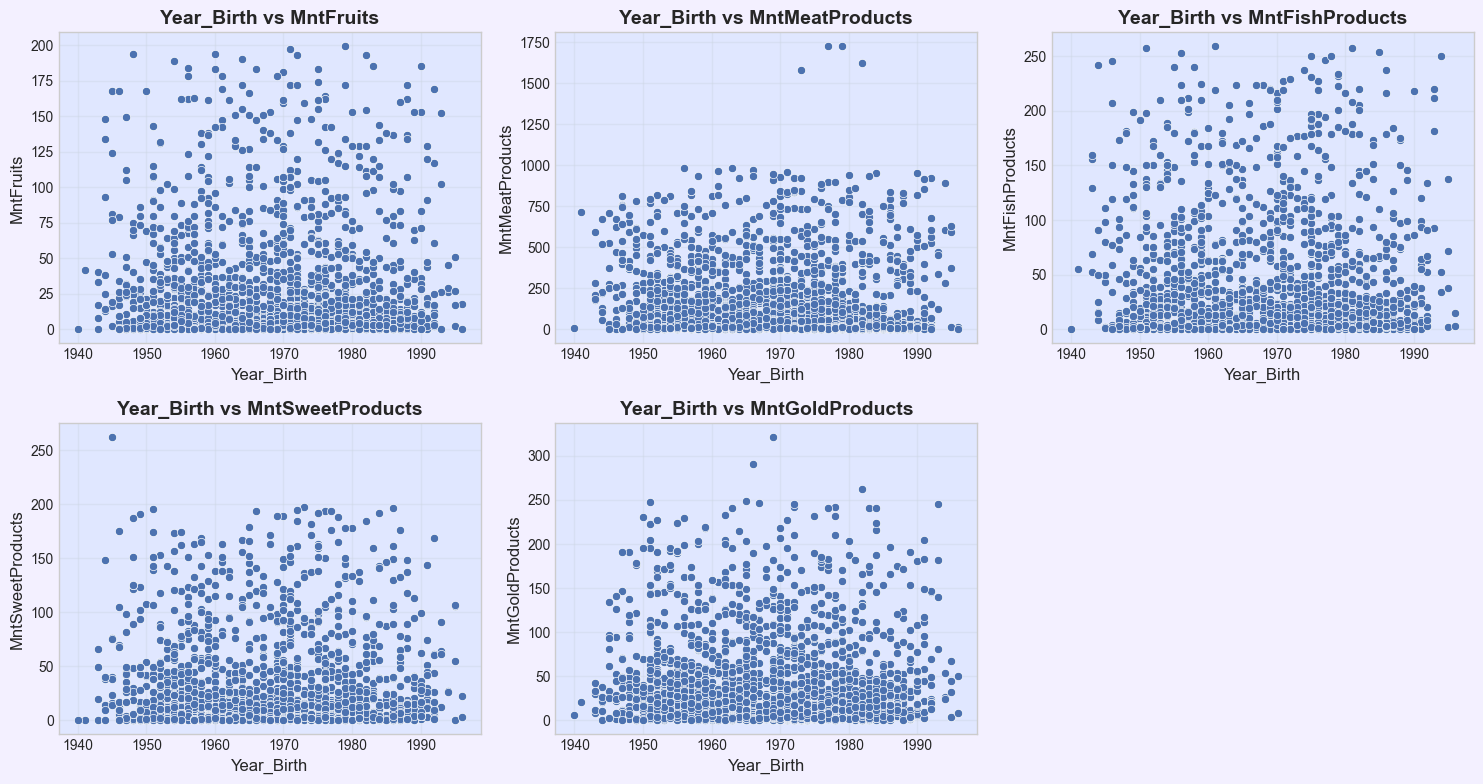

In [456]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProducts"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, y in enumerate(y_vars):
    sns.scatterplot(x="Year_Birth", y=y, data=data_camp_market, ax=axes[i])
    axes[i].set_title(f"Year_Birth vs {y}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

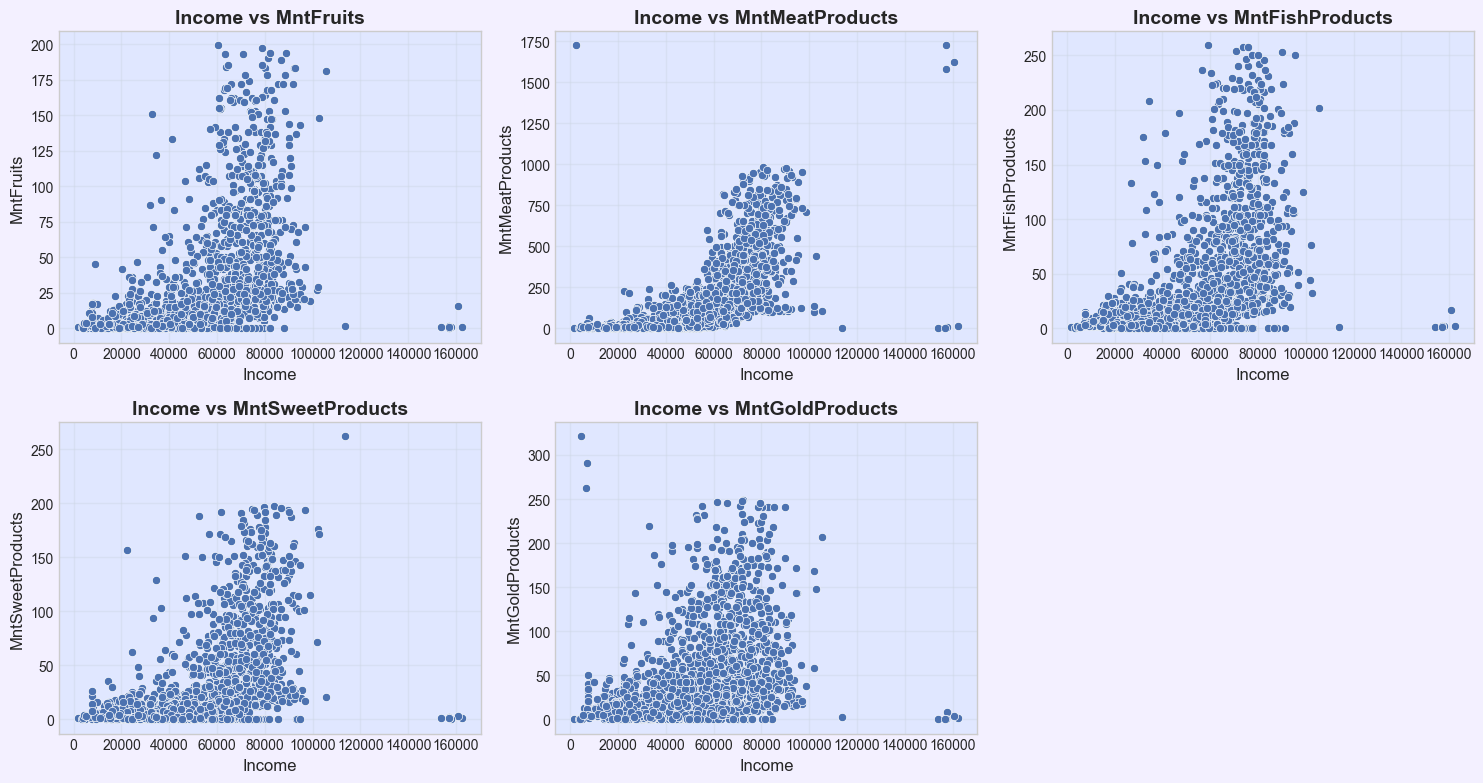

In [457]:
y_vars = ["MntFruits", "MntMeatProducts", "MntFishProducts",
          "MntSweetProducts", "MntGoldProducts"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, y in enumerate(y_vars):
    sns.scatterplot(x="Income", y=y, data=data_camp_market, ax=axes[i])
    axes[i].set_title(f"Income vs {y}")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Heatmap corrélation

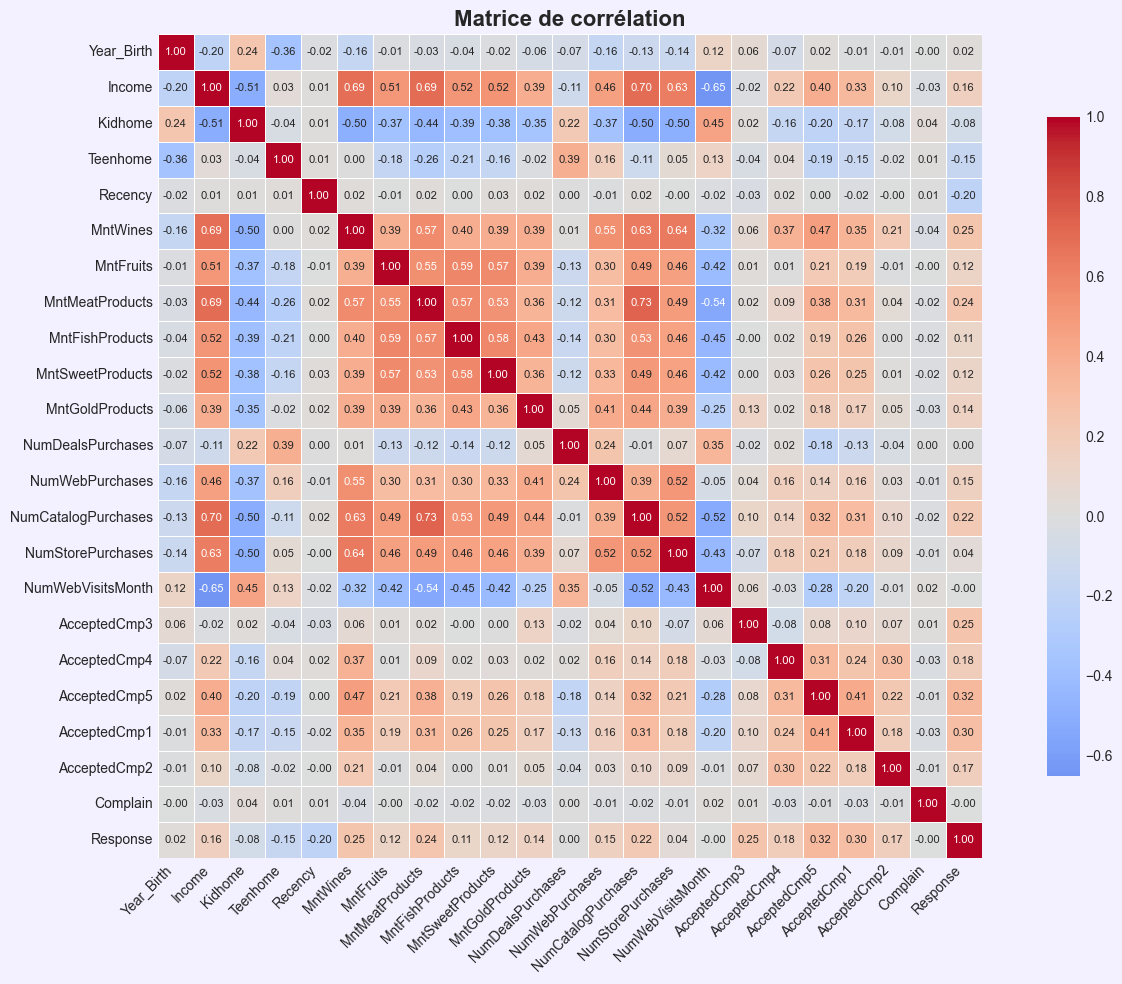

In [458]:
# Calcul de la matrice de corrélation
corr_matrix = data_camp_market.corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)
plt.title("Matrice de corrélation", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Feature engineering

In [459]:
# Âge
data_camp_market["Age"] = 2014 - data_camp_market["Year_Birth"]

# Nombre total d’enfants
data_camp_market["Children"] = data_camp_market["Kidhome"] + data_camp_market["Teenhome"]

# Ancienneté client (en années, depuis aujourd’hui)
today = pd.Timestamp("2014-07-01")
data_camp_market["Customer_Since_Years"] = (today - data_camp_market["Dt_Customer"]) / pd.Timedelta(days=365.25)

# Dépense totale
spend_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProducts"]
data_camp_market["Total_Spent"] = data_camp_market[spend_cols].sum(axis=1)

# Canal préféré (web / catalogue / magasin) selon le max des achats
channel_cols = ["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
preferred_idx = data_camp_market[channel_cols].idxmax(axis=1)
data_camp_market["Preferred_Channel"] = preferred_idx.map({
    "NumWebPurchases": "web",
    "NumCatalogPurchases": "catalog",
    "NumStorePurchases": "store"
})

# Nombre de campagnes acceptées
cmp_cols = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]
data_camp_market["Total_Campaign_Accepted"] = data_camp_market[cmp_cols].sum(axis=1)

# Variable Couple (1 = en couple, 0 = non)
couple_values = ["Married", "Together"]
data_camp_market["Couple"] = data_camp_market["Marital_Status"].isin(couple_values).astype(int)

new_cols = ["Age","Children","Customer_Since_Years","Total_Spent","Preferred_Channel","Total_Campaign_Accepted","Couple"]
display(data_camp_market[new_cols].head())

Age  Children  Customer_Since_Years  Total_Spent Preferred_Channel  \
0   57         0              1.820671         1617           catalog   
1   60         2              0.314853           27             store   
2   49         0              0.859685          776             store   
3   30         1              0.386037           53             store   
4   33         1              0.446270          422             store   

   Total_Campaign_Accepted  Couple  
0                        1       0  
1                        0       0  
2                        0       1  
3                        0       1  
4                        0       1

In [460]:
# Supprimer colonnes d'origine
data_camp_market = data_camp_market.drop(columns=["Year_Birth", "Dt_Customer", "Kidhome", "Teenhome", "Marital_Status"])

In [461]:
data_camp_market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2215
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2212 non-null   object 
 1   Income                   2212 non-null   float64
 2   Recency                  2212 non-null   int64  
 3   MntWines                 2212 non-null   int64  
 4   MntFruits                2212 non-null   int64  
 5   MntMeatProducts          2212 non-null   int64  
 6   MntFishProducts          2212 non-null   int64  
 7   MntSweetProducts         2212 non-null   int64  
 8   MntGoldProducts          2212 non-null   int64  
 9   NumDealsPurchases        2212 non-null   int64  
 10  NumWebPurchases          2212 non-null   int64  
 11  NumCatalogPurchases      2212 non-null   int64  
 12  NumStorePurchases        2212 non-null   int64  
 13  NumWebVisitsMonth        2212 non-null   int64  
 14  AcceptedCmp3             2212

## Standardisation

In [473]:
# --- 1️⃣ Sélection des variables numériques ---
num_cols = data_camp_market.select_dtypes(include=[np.number]).columns.tolist()
df_num = data_camp_market[num_cols]

# --- 2️⃣ Standardisation des données ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_num)

## ACP 

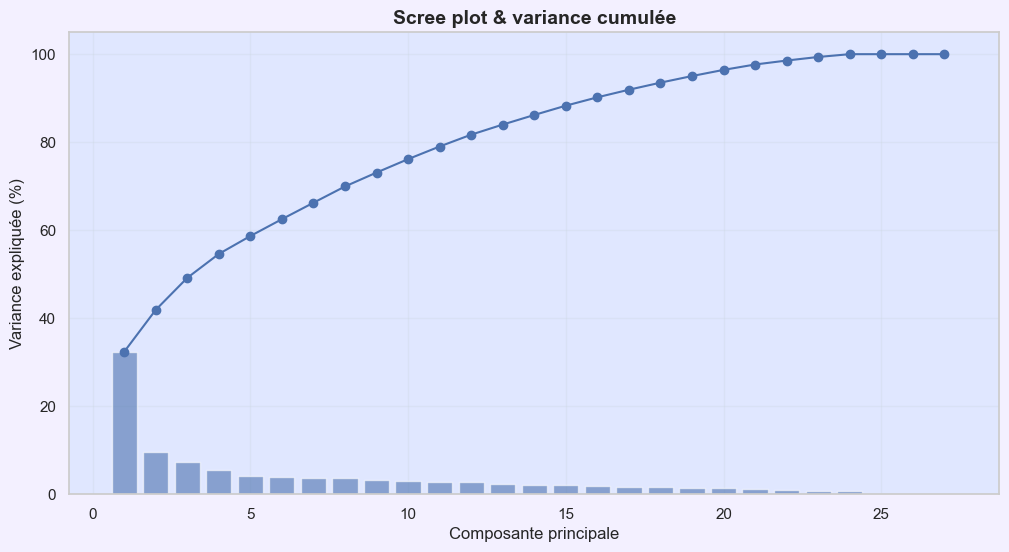

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.592593 -0.330944  1.438389 -2.513761 -0.218483 -1.446735  0.671684   
1 -2.844842 -0.044211 -0.794292  0.938542  1.689097 -0.993260  0.674509   
2  1.494322 -1.508613 -0.103346  0.310932  0.349504 -0.170539 -0.794270   
3 -2.830348  0.007034 -1.177762 -0.056607 -0.209508  0.213237 -0.992662   
4 -0.567996 -1.021622  0.274177  0.484570 -0.720848  1.235900 -0.051363   

        PC8       PC9      PC10  ...      PC18      PC19      PC20      PC21  \
0 -0.703679 -0.966816  1.316681  ...  0.142436  0.609443  0.469954  0.189138   
1 -0.724116 -0.332786 -0.102478  ... -0.042832  0.347085 -0.113848  0.009811   
2  0.883448  0.823628  0.577160  ... -0.440094 -0.236473  0.981566  0.701454   
3  0.820020  0.467253 -0.784411  ...  0.008602 -0.200691  0.191753 -0.207920   
4 -0.463209 -0.006122 -1.472946  ... -0.100238 -0.544567  0.192923  0.439858   

       PC22      PC23      PC24          PC25          PC26          PC27  
0  0.920450  0.209629 -0.152324  1.066936e-15 -3.695633e-15  4.584234e-15  
1  0.106444  0.007134  0.039253  1.073541e-15  7.991554e-16 -1.255077e-15  
2 -0.107552 -0.222080  0.375447 -4.874010e-16  1.623269e-16  8.728370e-16  
3 -0.000363  0.041993 -0.264128  2.883835e-16 -2.181182e-16  9.392927e-17  
4  0.218903 -0.315899  0.355609 -1.018832e-15 -9.193557e-16  1.318697e-15  

[5 rows x 27 columns]

In [474]:
# --- 3️⃣ ACP complète ---
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

# --- 4️⃣ Variance expliquée ---
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = variance_ratio.cumsum()

# --- 5️⃣ Visualisation de la variance expliquée ---
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(variance_ratio)+1), variance_ratio*100, alpha=0.6)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, marker='o')
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée (%)")
plt.title("Scree plot & variance cumulée")
plt.grid(alpha=0.3)
plt.show()

# Optionnel : créer un DataFrame avec les composantes
df_pca = pd.DataFrame(pca_components, 
                      columns=[f"PC{i+1}" for i in range(pca_components.shape[1])])

df_pca.head()


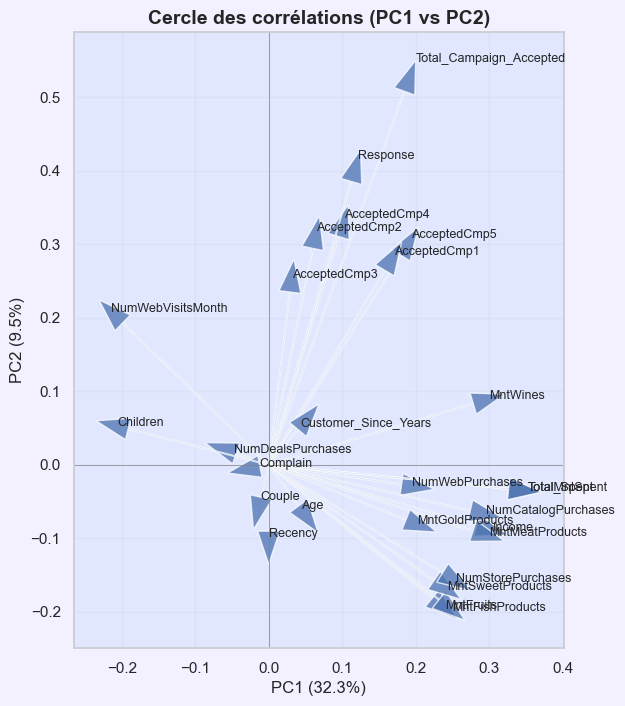

In [475]:
# --- Cercle des corrélations PC1 / PC2 ---
import numpy as np
import matplotlib.pyplot as plt

# Récupérer les loadings des variables sur chaque composante (poids)
loadings = pca.components_.T  # shape: (nb_variables, nb_components)

fig, ax = plt.subplots(figsize=(8, 8))

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

# Ajouter les flèches pour chaque variable
for i, col in enumerate(num_cols):
    ax.arrow(0, 0,
             loadings[i, 0],
             loadings[i, 1],
             head_width=0.03,
             alpha=0.75)
    
    ax.text(loadings[i, 0]*1.08,
            loadings[i, 1]*1.08,
            col,
            fontsize=9)

ax.set_xlabel(f"PC1 ({variance_ratio[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({variance_ratio[1]*100:.1f}%)")
ax.set_title("Cercle des corrélations (PC1 vs PC2)")
ax.axhline(0, color='grey', linewidth=0.5)
ax.axvline(0, color='grey', linewidth=0.5)
ax.set_aspect('equal')
plt.grid(alpha=0.3)
plt.show()


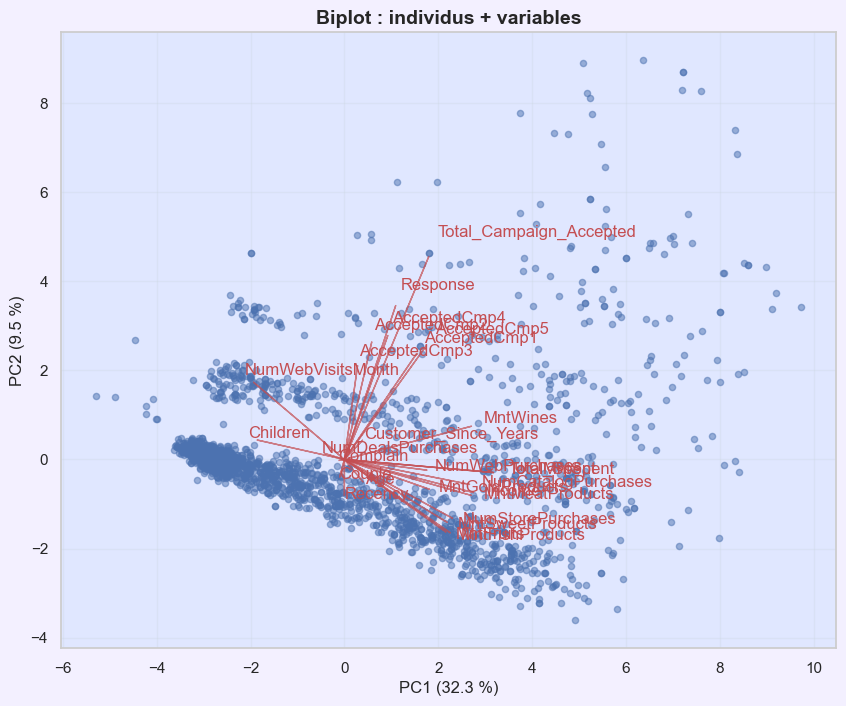

In [476]:
plt.figure(figsize=(10, 8))

# Points des individus
plt.scatter(pca_components[:, 0], pca_components[:, 1],
            alpha=0.5, s=20)

# Flèches des variables
for i, col in enumerate(num_cols):
    plt.arrow(0, 0,
              loadings[i, 0]*max(pca_components[:, 0]),
              loadings[i, 1]*max(pca_components[:, 1]),
              color='r', alpha=0.7)
    plt.text(loadings[i, 0]*max(pca_components[:, 0])*1.1,
             loadings[i, 1]*max(pca_components[:, 1])*1.1,
             col, color='r')

plt.xlabel(f"PC1 ({variance_ratio[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({variance_ratio[1]*100:.1f} %)")
plt.title("Biplot : individus + variables")
plt.grid(alpha=0.3)
plt.show()


## Clustering

c:\Users\Ayoox\Documents\Alternance 25-27\Epitech\Piscine MBA 2025-2026\RUSH 4\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8600 (\N{SOUTH EAST ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ayoox\Documents\Alternance 25-27\Epitech\Piscine MBA 2025-2026\RUSH 4\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65038 (\N{VARIATION SELECTOR-15}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ayoox\Documents\Alternance 25-27\Epitech\Piscine MBA 2025-2026\RUSH 4\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


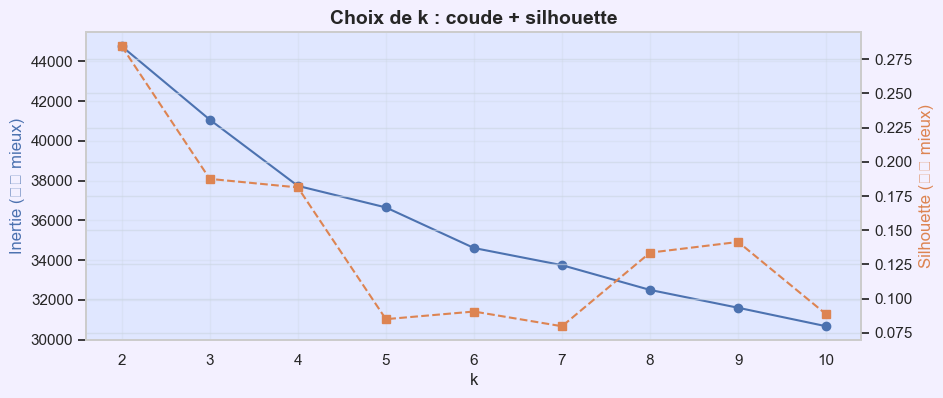

⭐ Meilleur k = 2


Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  \
0  Graduation  58138.0       58       635         88              546   
1  Graduation  46344.0       38        11          1                6   
2  Graduation  71613.0       26       426         49              127   
3  Graduation  26646.0       26        11          4               20   
4         PhD  58293.0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProducts  NumDealsPurchases  ...  \
0              172                88               88                  3  ...   
1                2                 1                6                  2  ...   
2              111                21               42                  1  ...   
3               10                 3                5                  2  ...   
4               46                27               15                  5  ...   

   Complain  Response  Age  Children  Customer_Since_Years  Total_Spent  \
0         0         1   57         0              1.820671         1617   
1         0         0   60         2              0.314853           27   
2         0         0   49         0              0.859685          776   
3         0         0   30         1              0.386037           53   
4         0         0   33         1              0.446270          422   

   Preferred_Channel  Total_Campaign_Accepted  Couple  cluster  
0            catalog                        1       0        0  
1              store                        0       0        1  
2              store                        0       1        0  
3              store                        0       1        1  
4              store                        0       1        1  

[5 rows x 29 columns]

In [477]:
from sklearn.metrics import silhouette_score
X = data_scaled 

# Choix du meilleur k : inertie + silhouette
Ks = range(2, 11)
inertias = []
silhouettes = []

for k in Ks:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X, labels))

# --- Visualisation du coude + silhouette ---
fig, ax1 = plt.subplots(figsize=(10,4))
ax1.plot(Ks, inertias, marker='o')
ax1.set_xlabel("k")
ax1.set_ylabel("Inertie (↘︎ mieux)", color='C0')
ax1.grid(alpha=0.3)

ax2 = ax1.twinx()
ax2.plot(Ks, silhouettes, marker='s', linestyle='--', color='C1')
ax2.set_ylabel("Silhouette (↗︎ mieux)", color='C1')
plt.title("Choix de k : coude + silhouette")
plt.show()

# --- Sélection du k optimal basé sur la silhouette ---
best_k = Ks[int(np.argmax(silhouettes))]
print("⭐ Meilleur k =", best_k)

# --- Apprentissage final ---
kmeans = KMeans(n_clusters=best_k, n_init="auto", random_state=42)
labels = kmeans.fit_predict(X)

# Réinjecter dans df si tu veux analyser
df_kmeans = df.copy()
df_kmeans["cluster"] = labels

df_kmeans.head()


## Analyse clustering

In [478]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2212 non-null   object 
 1   Income                   2212 non-null   float64
 2   Recency                  2212 non-null   int64  
 3   MntWines                 2212 non-null   int64  
 4   MntFruits                2212 non-null   int64  
 5   MntMeatProducts          2212 non-null   int64  
 6   MntFishProducts          2212 non-null   int64  
 7   MntSweetProducts         2212 non-null   int64  
 8   MntGoldProducts          2212 non-null   int64  
 9   NumDealsPurchases        2212 non-null   int64  
 10  NumWebPurchases          2212 non-null   int64  
 11  NumCatalogPurchases      2212 non-null   int64  
 12  NumStorePurchases        2212 non-null   int64  
 13  NumWebVisitsMonth        2212 non-null   int64  
 14  AcceptedCmp3             2212

In [479]:
cluster_profile = df_kmeans.groupby("cluster").mean(numeric_only=True)
cluster_profile


Income    Recency    MntWines  MntFruits  MntMeatProducts  \
cluster                                                                    
0        72052.415205  49.474854  621.789474  56.846784       370.421053   
1        39298.507001  48.732498  105.870302   7.101695        38.879882   

         MntFishProducts  MntSweetProducts  MntGoldProducts  \
cluster                                                       
0              80.921637         58.452632        76.043275   
1              10.383935          7.258659        23.689757   

         NumDealsPurchases  NumWebPurchases  ...  AcceptedCmp1  AcceptedCmp2  \
cluster                                      ...                               
0                 2.017544         5.718129  ...      0.157895      0.032749   
1                 2.518055         3.061164  ...      0.005158      0.001474   

         Complain  Response        Age  Children  Customer_Since_Years  \
cluster                                                                  
0        0.008187  0.242105  46.894737  0.479532              1.045456   
1        0.009580  0.092852  43.946942  1.242447              0.928803   

         Total_Spent  Total_Campaign_Accepted    Couple  
cluster                                                  
0        1264.474854                 0.849123  0.626901  
1         193.184230                 0.196758  0.657332  

[2 rows x 26 columns]

## Analyse efficacité des campagnes marketing

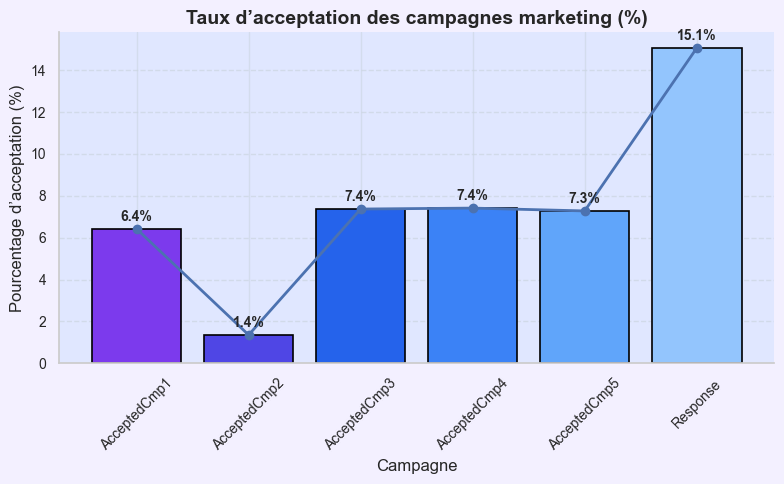

In [480]:

# Columns des campagnes
cols = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Calculate acceptance rates (%)
acceptation_rates = df[cols].mean() * 100

colors = ['#7C3AED', '#4F46E5', '#2563EB', '#3B82F6', '#60A5FA', '#93C5FD']

plt.figure(figsize=(8,5))

# Bar chart
plt.bar(acceptation_rates.index, acceptation_rates.values, color=colors, edgecolor='black', linewidth=1.2)

# Add line curve on top
plt.plot(acceptation_rates.index, acceptation_rates.values, marker='o', linestyle='-', linewidth=2)

# Style & labels
plt.title("Taux d’acceptation des campagnes marketing (%)", fontsize=14, fontweight='bold')
plt.ylabel("Pourcentage d’acceptation (%)", fontsize=12)
plt.xlabel("Campagne", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

fig = plt.gcf()
ax = plt.gca()

# Add data labels
for i, v in enumerate(acceptation_rates.values):
    plt.text(i, v + 0.4, f"{v:.1f}%", ha='center', fontsize=10, fontweight='bold')

# Remove borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\3028978109.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=violet_blue_palette)


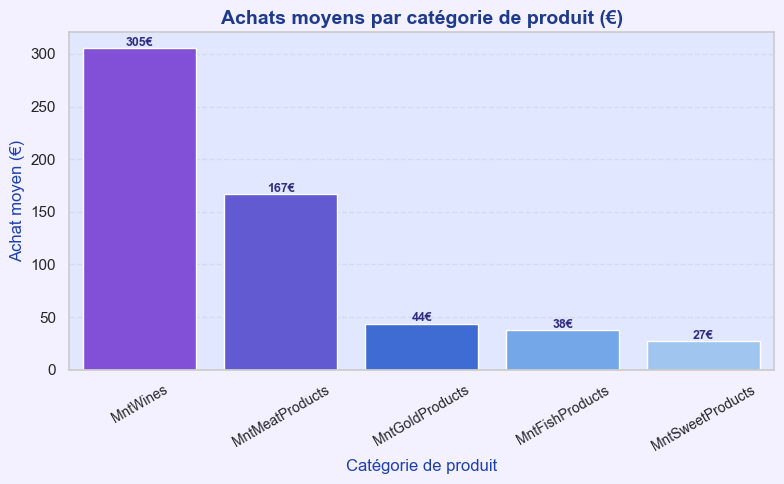

C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\3028978109.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Income', data=df, palette=['#60A5FA', '#7C3AED'])


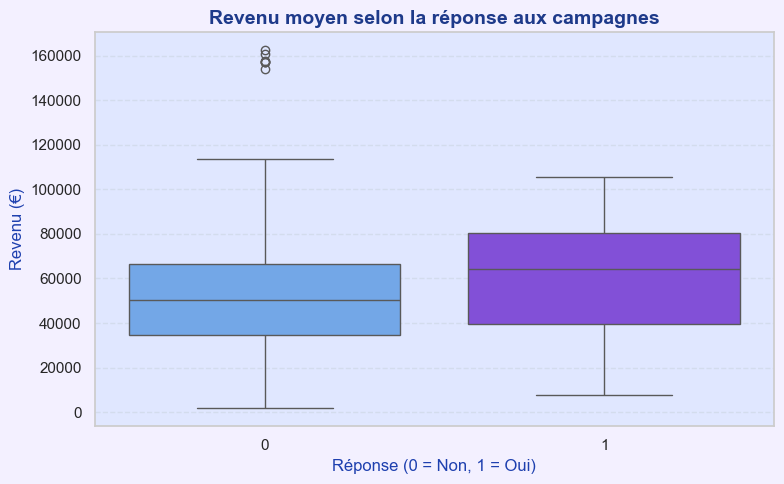

C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\3028978109.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


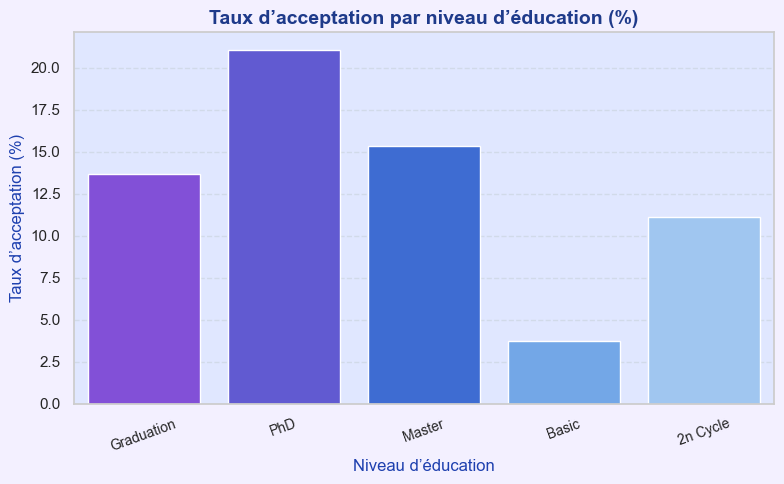

In [481]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.facecolor'] = '#E0E7FF'
plt.rcParams['figure.facecolor'] = '#F3F0FF'
plt.rcParams['grid.color'] = '#CBD5E1'
plt.rcParams['grid.alpha'] = 0.6

violet_blue_palette = ['#7C3AED', '#4F46E5', '#2563EB', '#60A5FA', '#93C5FD']  # violet → bleu ciel


mnt_cols = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
Achats_moyens = df[mnt_cols].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=violet_blue_palette)
plt.title("Achats moyens par catégorie de produit (€)", color='#1E3A8A')
plt.ylabel("Achat moyen (€)", color='#1E40AF')
plt.xlabel("Catégorie de produit", color='#1E40AF')
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(Achats_moyens.values):
    plt.text(i, v + 2, f"{v:.0f}€", ha='center', fontsize=9, fontweight='bold', color='#312E81')

plt.tight_layout()
plt.show()
legend=False
# Revenu moyen selon la réponse aux campagnes

plt.figure()
sns.boxplot(x='Response', y='Income', data=df, palette=['#60A5FA', '#7C3AED'])
plt.title("Revenu moyen selon la réponse aux campagnes", color='#1E3A8A')
plt.xlabel("Réponse (0 = Non, 1 = Oui)", color='#1E40AF')
plt.ylabel("Revenu (€)", color='#1E40AF')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Taux d’acceptation par niveau d’éducation

plt.figure()
sns.barplot(
    x='Education',
    y='Response',
    data=df,
    estimator=lambda x: 100 * x.mean(),
    palette=violet_blue_palette,
    errorbar=None
)
plt.title("Taux d’acceptation par niveau d’éducation (%)", color='#1E3A8A')
plt.ylabel("Taux d’acceptation (%)", color='#1E40AF')
plt.xlabel("Niveau d’éducation", color='#1E40AF')
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


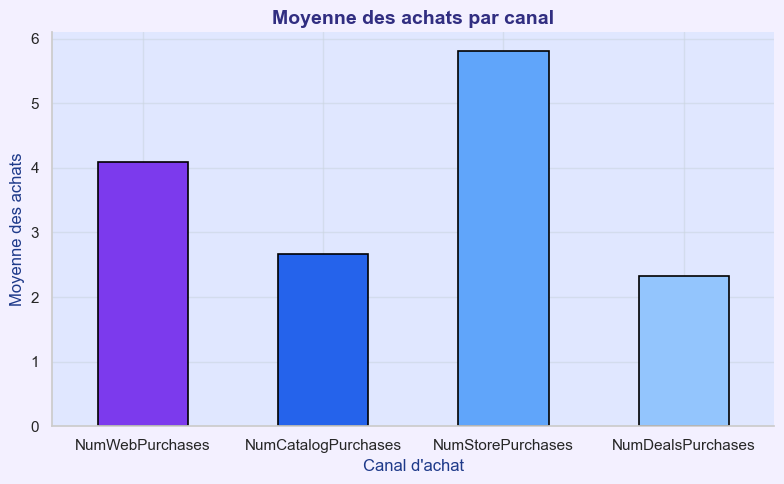

In [482]:
# Calcul de la moyenne des achats par canal
avg_channels = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumDealsPurchases']].mean()

colors = ['#7C3AED', '#2563EB', '#60A5FA', '#93C5FD']  # violet, bleu foncé, bleu moyen, bleu ciel

plt.figure(figsize=(8, 5))
avg_channels.plot(
    kind='bar',
    color=colors,
    edgecolor='black',
    linewidth=1.2
)

plt.title("Moyenne des achats par canal", fontsize=14, fontweight='bold', color='#312E81')
plt.xlabel("Canal d'achat", fontsize=12, color='#1E3A8A')
plt.ylabel("Moyenne des achats", fontsize=12, color='#1E3A8A')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [483]:
data_camp_market['TotalMntSpent'] = data_camp_market['MntWines'] + data_camp_market['MntFruits'] + data_camp_market['MntMeatProducts'] + data_camp_market['MntFishProducts'] + data_camp_market['MntSweetProducts'] + data_camp_market['MntGoldProducts']

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_spending = {}

for col in campaign_cols:
    campaign_spending[col] = df.groupby(col)['TotalMntSpent'].mean()

for campaign, spending in campaign_spending.items():
    print(f"Dépense moyenne pour {campaign}:")
    print(spending)
    print("-" * 30)

KeyError: 'Column not found: TotalMntSpent'

C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\2343013567.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=flash_palette)
C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\2343013567.py:15: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=flash_palette)


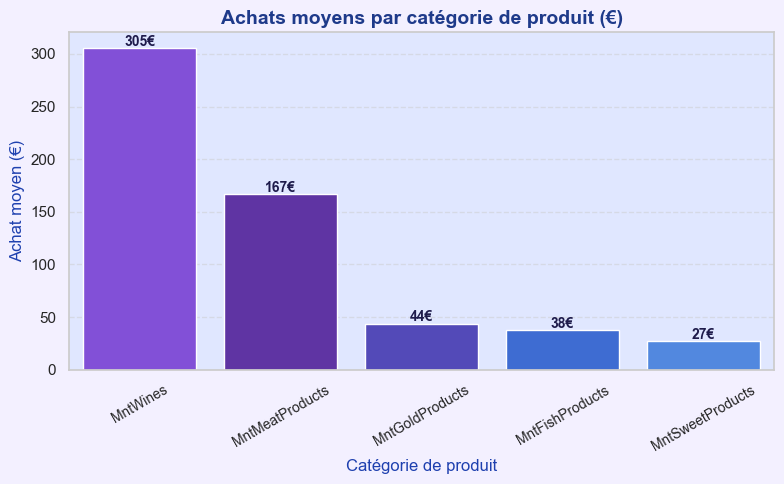

C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\2343013567.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Income', data=data_camp_market, palette=['#6366F1', '#7C3AED'])


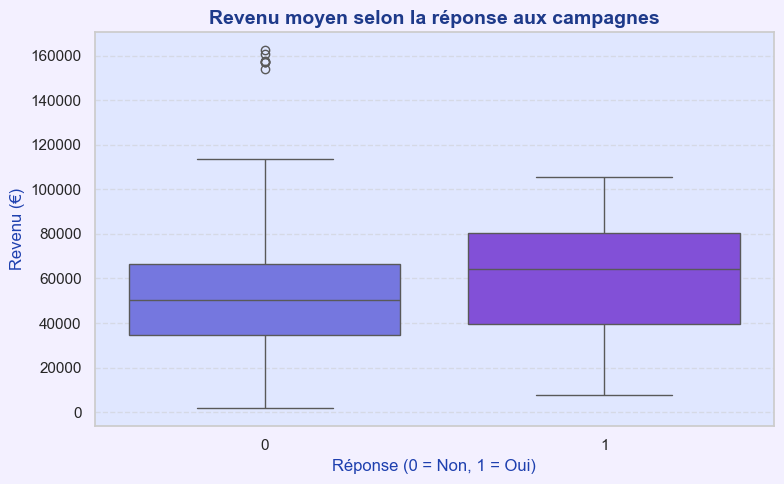

C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\2343013567.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\2343013567.py:43: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(


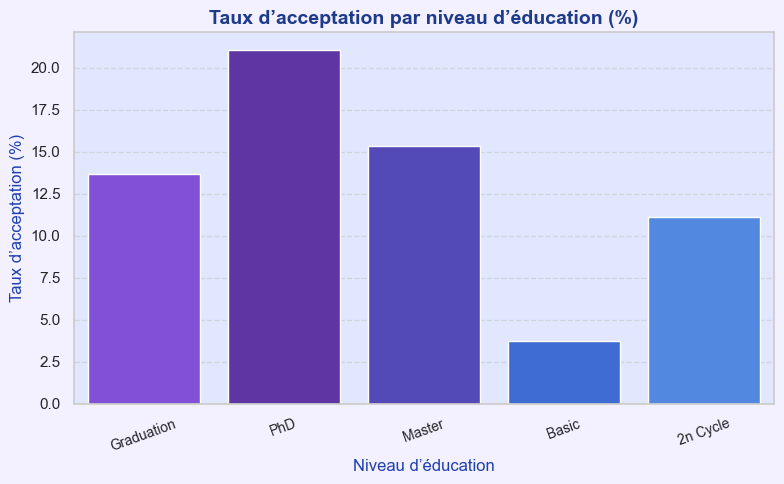

In [ ]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.facecolor'] = '#E0E7FF'
plt.rcParams['figure.facecolor'] = '#F3F0FF'

flash_palette = ['#7C3AED', '#5B21B6', '#4338CA', '#2563EB', '#3B82F6', '#60A5FA']

# Achats moyens par catégorie de produit
mnt_cols = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts']
Achats_moyens = data_camp_market[mnt_cols].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=Achats_moyens.index, y=Achats_moyens.values, palette=flash_palette)
plt.title("Achats moyens par catégorie de produit (€)", color='#1E3A8A')
plt.ylabel("Achat moyen (€)", color='#1E40AF')
plt.xlabel("Catégorie de produit", fontsize=12, color='#1E40AF')
plt.xticks(rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Valeurs au-dessus des barres
for i, v in enumerate(Achats_moyens.values):
    plt.text(i, v + 2, f"{v:.0f}€", ha='center', fontsize=10, fontweight='bold', color='#1E1B4B')

plt.tight_layout()
plt.show()

# Revenu moyen selon la réponse aux campagnes

plt.figure()
sns.boxplot(x='Response', y='Income', data=data_camp_market, palette=['#6366F1', '#7C3AED'])
plt.title("Revenu moyen selon la réponse aux campagnes", color='#1E3A8A')
plt.xlabel("Réponse (0 = Non, 1 = Oui)", color='#1E40AF')
plt.ylabel("Revenu (€)", color='#1E40AF')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Taux d’acceptation par niveau d’éducation

plt.figure()
sns.barplot(
    x='Education',
    y='Response',
    data=data_camp_market,
    estimator=lambda x: 100 * x.mean(),
    palette=flash_palette,
    errorbar=None
)
plt.title("Taux d’acceptation par niveau d’éducation (%)", color='#1E3A8A')
plt.ylabel("Taux d’acceptation (%)", color='#1E40AF')
plt.xlabel("Niveau d’éducation", color='#1E40AF')
plt.xticks(rotation=20, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ACP - Analyse en Composantes Principales

In [ ]:
numeric_cols = data_camp_market.select_dtypes(include=['int64', 'float64']).columns
X = data_camp_market[numeric_cols].drop(columns=['ID'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].drop(columns=['ID'], errors='ignore')

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled_imputed = scaler.fit_transform(X_imputed)


pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled_imputed)

explaind = pca.explained_variance_ratio_
cumexp = explained.cumsum()
scores = pd.DataFrame(X_pca, index=df.index, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

loadings_df = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [ ]:

# les variables pour le clustering (important)
features = ['Age','Income','TotalSpent','TotalAcceptedCmp']
X = df[features]

# Normaliser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# la colonne des clusters dans le dataframe
df['Cluster_KMeans'] = kmeans.labels_


In [ ]:
cluster_summary = df.groupby('Cluster_KMeans')[['Age','Income','TotalSpent','TotalAcceptedCmp','Response']].mean().round(1)
print(cluster_summary)

                 Age   Income  TotalSpent  TotalAcceptedCmp  Response
Cluster_KMeans                                                       
0               48.8  69514.4      1073.3               0.3       0.1
1               42.8  36275.7       155.5               0.2       0.1
2               44.1  77597.7      1512.4               2.8       0.8


## K-means

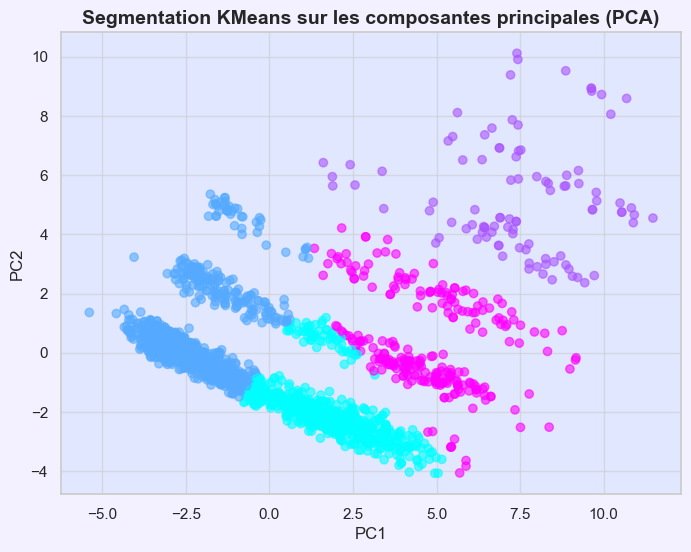

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

df['Cluster_KMeans'] = kmeans.fit_predict(scores[['PC1', 'PC2']])

plt.figure(figsize=(8,6))
plt.scatter(scores['PC1'], scores['PC2'], c=df['Cluster_KMeans'], cmap='cool', alpha=0.6)
plt.title("Segmentation KMeans sur les composantes principales (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:

if 'Age' not in df.columns and 'Year_Birth' in df.columns:
    df['Age'] = 2025 - df['Year_Birth']

if 'TotalSpent' not in df.columns:
    spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProducts']

    if all(col in df.columns for col in spend_cols):
        df['TotalSpent'] = df[spend_cols].sum(axis=1)
    else:
        print("Warning: Some spending columns are missing. TotalSpent not calculated.")


if 'TotalAcceptedCmp' not in df.columns:
    cmp_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

    if all(col in df.columns for col in cmp_cols):
         df['TotalAcceptedCmp'] = df[cmp_cols].sum(axis=1)
    else:
         print("Warning: Some campaign columns are missing. TotalAcceptedCmp not calculated.")

features = ['Age','Income','TotalSpent','TotalAcceptedCmp']
if all(f in df.columns for f in features):
    X = df[features]
else:
    print(f"Error: Not all required features {features} are available in the DataFrame.")

    raise KeyError(f"Not all required features {features} are available in the DataFrame.")



imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['Cluster_KMeans'] = kmeans.labels_

In [ ]:
if 'Age' not in df.columns and 'Year_Birth' in df.columns:
    df['Age'] = 2025 - df['Year_Birth']

if 'TotalSpent' not in df.columns:
    gold_col = 'MntGoldProducts' if 'MntGoldProducts' in df.columns else ('MntGoldProducts' if 'MntGoldProducts' in df.columns else None)
    if gold_col:
        spend_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts', gold_col]
        df['TotalSpent'] = df[spend_cols].sum(axis=1)

if 'TotalAcceptedCmp' not in df.columns:
    df['TotalAcceptedCmp'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

if 'Cluster_KMeans' not in df.columns and 'kmeans' in locals():
    df['Cluster_KMeans'] = kmeans.labels_

if 'Cluster_Agglo' not in df.columns and 'agglo' in locals():
    df['Cluster_Agglo'] = agglo.labels_

cluster_col = 'Cluster_KMeans'
if cluster_col not in df.columns:
    cluster_col = 'Cluster_Agglo'
    if cluster_col not in df.columns:
        raise KeyError("Colonne de clusters introuvable (ex: 'Cluster_KMeans' ou 'Cluster_Agglo').")

print(f"Taille des clusters ({cluster_col}) :")
print(df[cluster_col].value_counts().sort_index())

summary_cols = [c for c in ['Age','Income','TotalSpent','TotalAcceptedCmp','TotalPurchases','CustomerSince']
                if c in df.columns]

cluster_summary = (
    df.groupby(cluster_col)[summary_cols]
      .mean()
      .round(1)
)

if 'Response' in df.columns:
    cluster_summary['Response_rate_%'] = (df.groupby(cluster_col)['Response'].mean() * 100).round(1)

print(f"\nRésumé des clusters ({cluster_col} - moyennes) :")
print(cluster_summary)

sizes = df[cluster_col].value_counts().sort_index().rename('Size')
cluster_summary = cluster_summary.join(sizes)
cluster_summary = cluster_summary[['Size'] + [c for c in cluster_summary.columns if c != 'Size']]
print(f"\nRésumé avec tailles ({cluster_col}) :")
print(cluster_summary)

Taille des clusters (Cluster_KMeans) :
Cluster_KMeans
0     805
1    1215
2     192
Name: count, dtype: int64

Résumé des clusters (Cluster_KMeans - moyennes) :
                 Age   Income  TotalSpent  TotalAcceptedCmp  Response_rate_%
Cluster_KMeans                                                              
0               48.8  69514.4      1073.3               0.3              8.9
1               42.8  36275.7       155.5               0.2              9.6
2               44.1  77597.7      1512.4               2.8             75.0

Résumé avec tailles (Cluster_KMeans) :
                Size   Age   Income  TotalSpent  TotalAcceptedCmp  \
Cluster_KMeans                                                      
0                805  48.8  69514.4      1073.3               0.3   
1               1215  42.8  36275.7       155.5               0.2   
2                192  44.1  77597.7      1512.4               2.8   

                Response_rate_%  
Cluster_KMeans                   


In [ ]:
# Feature engineering
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
today = pd.Timestamp.today().normalize()

df["Age"] = today.year - df["Year_Birth"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Customer_Since_Years"] = (today - df["Dt_Customer"]).dt.days / 365.25

df["Total_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProducts"]

# Preferred channel
channels = {
    "Web": df["NumWebPurchases"],
    "Catalog": df["NumCatalogPurchases"],
    "Store": df["NumStorePurchases"]
}
df["Preferred_Channel"] = pd.DataFrame(channels).idxmax(axis=1)

cmp_cols = ["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5"]
df["Campaign_Accepted"] = df[cmp_cols].sum(axis=1)

df["Web_Conversion_Rate"] = df["NumWebPurchases"] / df["NumWebVisitsMonth"].replace(0, np.nan)
df["Web_Conversion_Rate"] = df["Web_Conversion_Rate"].fillna(0)


df["Preferred_Channel_Num"] = df["Preferred_Channel"].map({"Store":0,"Web":1,"Catalog":2})

features = ["Age","Children","Customer_Since_Years","Total_Spent","Campaign_Accepted","Web_Conversion_Rate","Preferred_Channel_Num"]
X = df[features].fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster summary
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
cluster_summary

Age  Children  Customer_Since_Years  Total_Spent  \
Cluster                                                       
0        59.02      0.42                 12.36      1157.63   
1        53.96      1.30                 12.13       155.95   
2        58.11      0.93                 12.57       712.47   
3        54.38      0.29                 12.28      1564.49   

         Campaign_Accepted  Web_Conversion_Rate  Preferred_Channel_Num  
Cluster                                                                 
0                     0.25                 2.02                   0.06  
1                     0.08                 0.44                   0.14  
2                     0.20                 1.15                   1.23  
3                     2.32                 2.15                   0.72

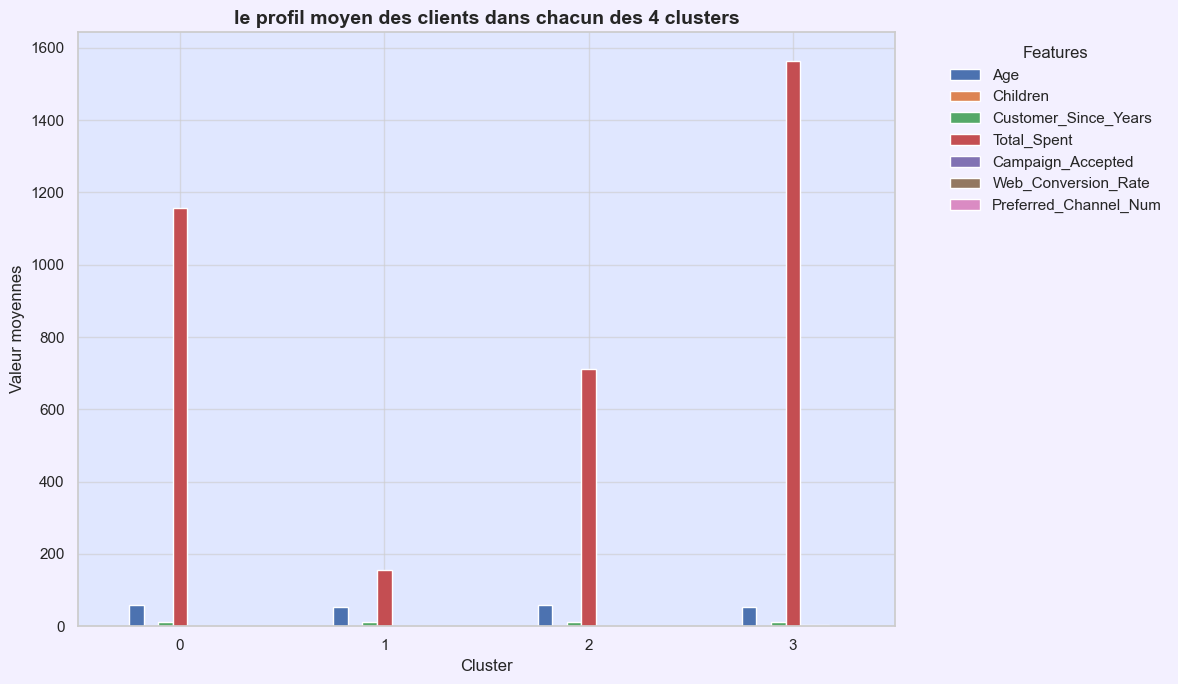

In [ ]:

if 'cluster_summary' in locals() and isinstance(cluster_summary, pd.DataFrame):

    cluster_summary_filled = cluster_summary.fillna(0)

    cluster_summary_filled.plot(kind='bar', figsize=(12, 7))
    plt.title("le profil moyen des clients dans chacun des 4 clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Valeur moyennes")
    plt.xticks(rotation=0)
    plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("cluster_summary DataFrame not found. Please ensure the clustering and summary cells have been executed.")

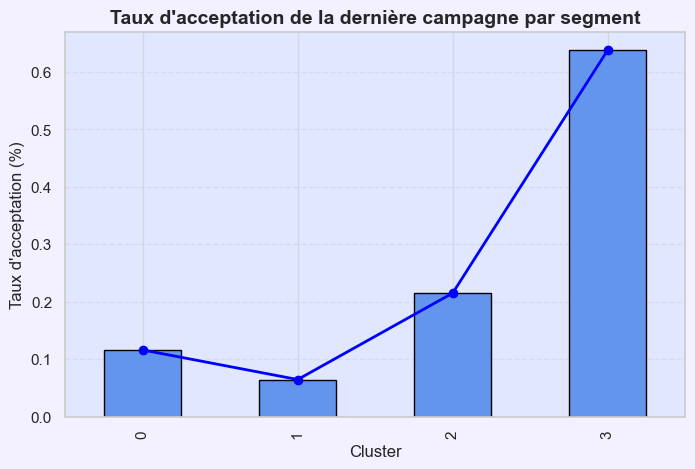

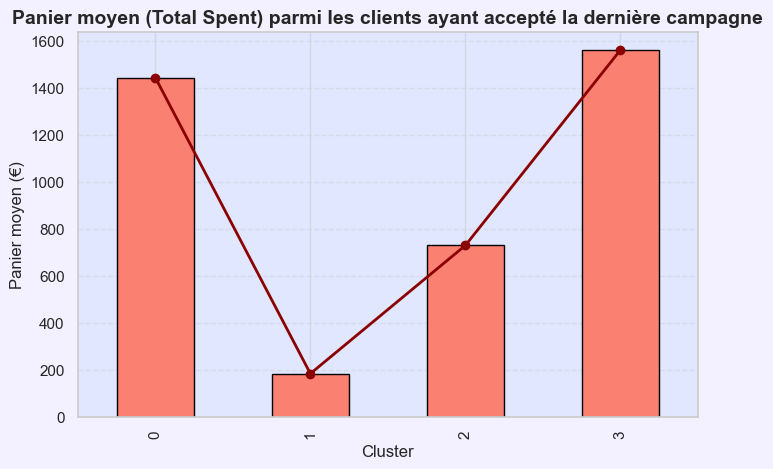

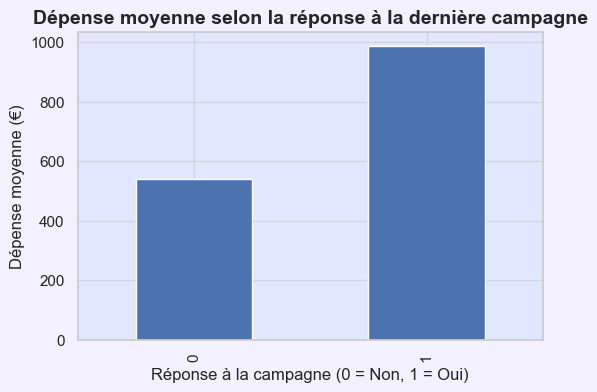

In [ ]:
# ===================== 3) Taux d'acceptation de la dernière campagne =====================

cluster_accept_rate = df.groupby("Cluster")["Response"].mean()

plt.figure(figsize=(8,5))
ax = cluster_accept_rate.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Ajout de la courbe
ax.plot(cluster_accept_rate.index, cluster_accept_rate.values, color='blue', marker='o', linewidth=2)

plt.title("Taux d'acceptation de la dernière campagne par segment")
plt.xlabel("Cluster")
plt.ylabel("Taux d'acceptation (%)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


# ===================== 4) Panier moyen parmi les clients ayant accepté la dernière campagne =====================

# Filtre uniquement ceux qui ont accepté
cluster_basket_last_campaign = df[df["Response"] == 1].groupby("Cluster")["Total_Spent"].mean()

plt.figure(figsize=(8,5))
ax = cluster_basket_last_campaign.plot(kind='bar', color='salmon', edgecolor='black')

# Ajout de la courbe
ax.plot(cluster_basket_last_campaign.index, cluster_basket_last_campaign.values, color='darkred', marker='o', linewidth=2)

plt.title("Panier moyen (Total Spent) parmi les clients ayant accepté la dernière campagne")
plt.xlabel("Cluster")
plt.ylabel("Panier moyen (€)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()




# Dépenses
df["Total_Spent"] = (
    df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] +
    df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProducts"]
)

# Average spening for customers who accepted the last campaign vs those who didn't
avg_spent_response = df.groupby("Response")["Total_Spent"].mean()

plt.figure(figsize=(6,4))
avg_spent_response.plot(kind="bar")

plt.title("Dépense moyenne selon la réponse à la dernière campagne")
plt.xlabel("Réponse à la campagne (0 = Non, 1 = Oui)")
plt.ylabel("Dépense moyenne (€)")
plt.show()

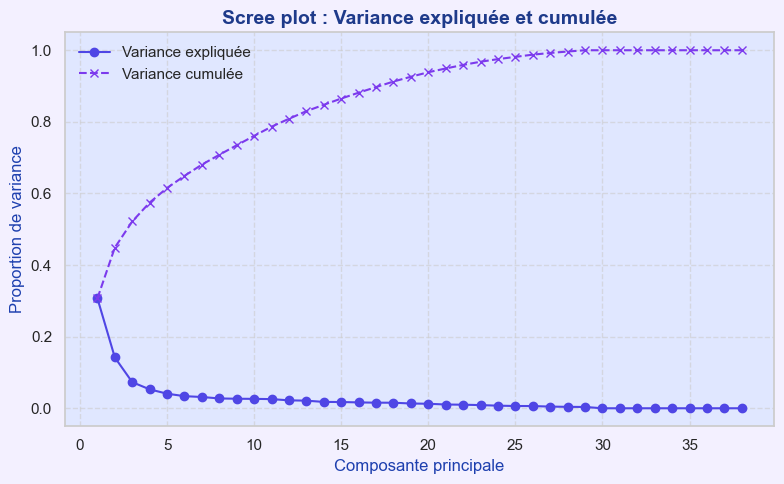

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained)+1), explained, marker="o", color="#4F46E5", label="Variance expliquée")
plt.plot(range(1, len(cumexp)+1), cumexp, marker="x", linestyle="--", color="#7C3AED", label="Variance cumulée")
plt.title("Scree plot : Variance expliquée et cumulée", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Composante principale", fontsize=12, color='#1E40AF')
plt.ylabel("Proportion de variance", fontsize=12, color='#1E40AF')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

pcx, pcy = "PC1", "PC2"
plt.figure(figsize=(10, 8))

plt.scatter(scores[pcx], scores[pcy], alpha=0.25, s=25, color="#60A5FA")
plt.axhline(0, color="#9CA3AF", linewidth=1)
plt.axvline(0, color="#9CA3AF", linewidth=1)

loadings_df["norm"] = np.sqrt(loadings_df[pcx]**2 + loadings_df[pcy]**2)
top_vars = loadings_df.sort_values("norm", ascending=False).head(10)

scale = 4.0
for var, (lx, ly) in top_vars[[pcx, pcy]].iterrows():
    plt.arrow(0, 0, lx * scale, ly * scale, color="#4F46E5", alpha=0.8,
              head_width=0.08, length_includes_head=True)
    plt.text(lx * scale * 1.25, ly * scale * 1.25, var,
             fontsize=10, color="#1E3A8A", fontweight='bold', ha='center')

plt.title("Biplot PCA (PC1 vs PC2)", fontsize=15, fontweight='bold', color='#1E3A8A')
plt.xlabel(f"{pcx} ({explained[0]*100:.1f}% variance)", fontsize=12, color='#1E40AF')
plt.ylabel(f"{pcy} ({explained[1]*100:.1f}% variance)", fontsize=12, color='#1E40AF')

fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('#F3F0FF')
ax.set_facecolor('#E0E7FF')
plt.grid(True, linestyle='--', alpha=0.5)

plt.xlim(-6, 8)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

## Modélisation - Création modèle prédictif

In [ ]:


# Prepare data for modeling
target = 'Response'
X = df.drop(columns=[target, 'ID', 'Dt_Customer'], errors='ignore')
y = df[target]

# Handle categorical features
X = pd.get_dummies(X, drop_first=True)

# Identify numerical columns for imputation
numerical_cols = X.select_dtypes(include=np.number).columns

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numerical features
# Note: Scaling should happen AFTER imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Comparaison de plusieurs modèles de classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Dictionnaire des modèles à comparer
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Précision": precision_score(y_test, y_pred),
        "Rappel": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

# Tableau des résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1-score", ascending=False).reset_index(drop=True)

# Affichage stylisé
display(results_df.style.background_gradient(cmap="Purples").format(subset=["Accuracy", "Précision", "Rappel", "F1-score"], formatter="{:.3f}"))

In [ ]:
params_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_log = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                        params_log, cv=5, scoring='f1', n_jobs=-1)
grid_log.fit(X_train_scaled, y_train)

print("Meilleurs paramètres (LogReg) :", grid_log.best_params_)
best_log = grid_log.best_estimator_


Meilleurs paramètres (LogReg) : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),

}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Modèle", "Accuracy", "Précision", "Rappel", "F1-score"])
print("Résultats du modèle:")
print(results_df)


Résultats du modèle:
                Modèle  Accuracy  Précision  Rappel  F1-score
0  Logistic Regression       1.0        1.0     1.0       1.0


In [ ]:

target = 'Response'
X = df.drop(columns=[target, 'ID', 'Dt_Customer'], errors='ignore')
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)


X_test_scaled_imputed = imputer.transform(X_test_scaled)


# Rééquilibrage des classes (SMOTE)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled_imputed, y_train)

# Entraînement du modèle pondéré
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_res, y_res)

# Probabilités prédictives using imputed test data
y_proba = log_model.predict_proba(X_test_scaled_imputed)[:, 1]

# Test de plusieurs seuils pour optimiser le rappel
thresholds = [0.3, 0.4, 0.5, 0.6]
results = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    results.append({
        "Seuil": t,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Précision": precision_score(y_test, y_pred),
        "Rappel": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
display(results_df.style.background_gradient(cmap="Purples").format("{:.2f}"))

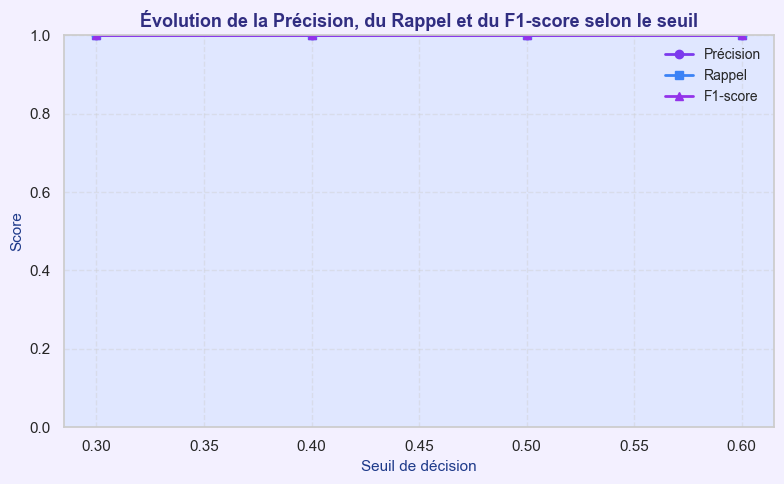

In [ ]:

#Courbe Précision - Rappel selon le seuil
plt.figure(figsize=(8,5))

# Courbes  dans ton thème violet-bleu
plt.plot(results_df["Seuil"], results_df["Précision"],
         marker='o', color="#7C3AED", label="Précision", linewidth=2)
plt.plot(results_df["Seuil"], results_df["Rappel"],
         marker='s', color="#3B82F6", label="Rappel", linewidth=2)
plt.plot(results_df["Seuil"], results_df["F1-score"],
         marker='^', color="#9333EA", label="F1-score", linewidth=2)

plt.title("Évolution de la Précision, du Rappel et du F1-score selon le seuil",
          fontsize=13, fontweight='bold', color="#312E81")
plt.xlabel("Seuil de décision", fontsize=11, color="#1E3A8A")
plt.ylabel("Score", fontsize=11, color="#1E3A8A")
plt.grid(alpha=0.4, linestyle="--")
plt.legend(loc="best", fontsize=10)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc

try:
    if 'X_test_scaled_imputed' not in locals() or 'y_test' not in locals() or 'log_model' not in locals():
         raise NameError("Modeling variables (X_test_scaled_imputed, y_test, log_model) not found. Please run the modeling cell first.")

    y_proba = log_model.predict_proba(X_test_scaled_imputed)[:, 1]

except NameError as e:
    print(e)
    print("Cannot generate ROC curve without model results.")
    pass


if 'y_proba' in locals():
    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, color="#4F46E5", lw=2, label=f"Régression Logistique (AUC = {roc_auc:.2f})")
    plt.plot([0,1], [0,1], color="gray", linestyle="--")
    plt.title("Courbe ROC - Régression Logistique", fontsize=14, fontweight='bold', color='#1E3A8A')
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("y_proba not available — ROC curve not generated.")

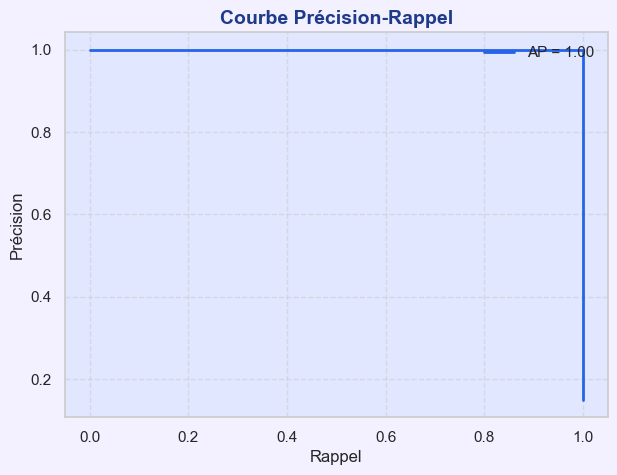

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_prec = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="#2563EB", lw=2, label=f"AP = {avg_prec:.2f}")
plt.title("Courbe Précision-Rappel", fontsize=14, fontweight='bold', color='#1E3A8A')
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Using threshold of 0.3 for confusion matrix based on F1-score optimization.


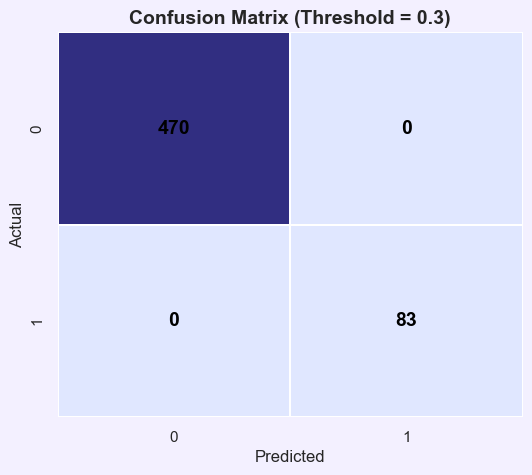

In [ ]:
best_threshold = 0.5

# 1) Détermination du threshold
if 'results_df' in locals():
    best_threshold = results_df.loc[results_df['F1-score'].idxmax(), 'Seuil']
    print(f"Using threshold of {best_threshold} for confusion matrix based on F1-score optimization.")

elif 'y_proba' in locals():
    print("Using default threshold of 0.5 for confusion matrix as threshold analysis results are not available.")
    best_threshold = 0.5

else:
    print("Could not determine threshold. Attempting to calculate y_proba...")
    if 'X_test_scaled_imputed' in locals() and 'log_model' in locals():
        y_proba = log_model.predict_proba(X_test_scaled_imputed)[:, 1]
        print("Calculated y_proba using available model and test data.")
    else:
        print("Cannot calculate y_proba. Skipping confusion matrix plot.")
        pass  # ou return si dans une fonction

# 2) Si y_proba existe, calcul des prédictions et affichage de la matrice
if 'y_proba' in locals():
    y_pred_log = (y_proba >= best_threshold).astype(int)

    cm = confusion_matrix(y_test, y_pred_log)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap=sns.color_palette(["#E0E7FF", "#6366F1", "#4F46E5", "#312E81"], as_cmap=True),
        cbar=False,
        linewidths=1.2,
        linecolor='white',
        annot_kws={"size": 14, "weight": "bold", "color": "black"}
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Threshold = {best_threshold})")
    plt.show()
else:
    print("y_proba not available — confusion matrix not generated.")


C:\Users\Ayoox\AppData\Local\Temp\ipykernel_23572\1401645331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Importance", y="Variable", palette="Purples_r")


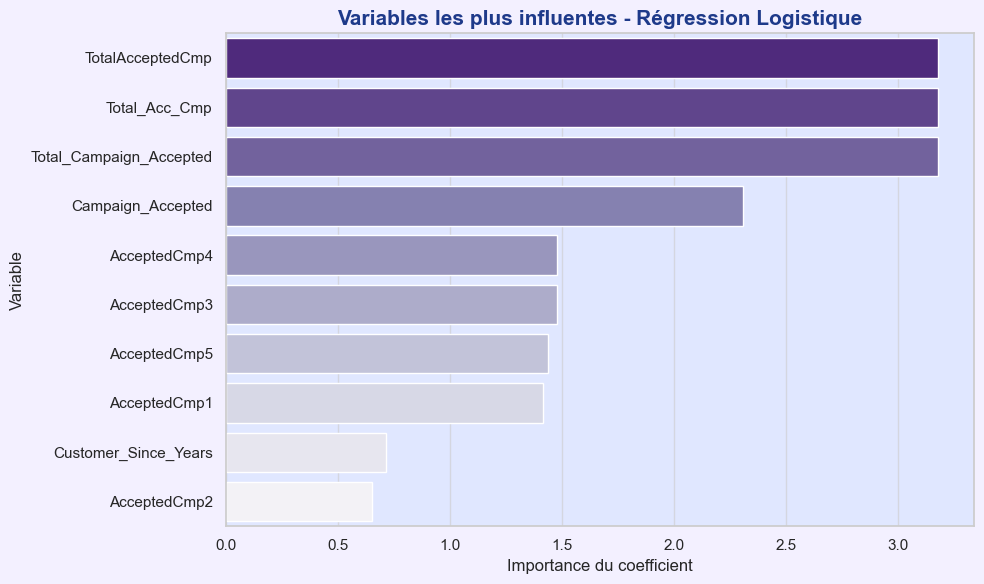

In [ ]:


importance = abs(log_model.coef_[0])
features = X_train.columns

coef_df = pd.DataFrame({"Variable": features, "Importance": importance}).sort_values("Importance", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x="Importance", y="Variable", palette="Purples_r")
plt.title("Variables les plus influentes - Régression Logistique", fontsize=15, fontweight='bold', color="#1E3A8A")
plt.xlabel("Importance du coefficient")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
